# SETUP

In [53]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 4
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed smt_rsb srso ibpb

In [54]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          48 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   8
  On-line CPU(s) list:    0-7
Vendor ID:                AuthenticAMD
  Model name:             AMD EPYC 7B12
    CPU family:           23
    Model:                49
    Thread(s) per core:   2
    Core(s) per socket:   4
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4499.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall
                           nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep
                          _good nopl nonstop_tsc cpuid extd_apicid tsc_known_fre
                          q pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic mo
                          vbe popcnt aes xsave avx f16c rdrand hypervisor lahf_l

## SETUP

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
!pip install -U "ray[tune]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 MB 39.5 MB/s eta 0:00:00


In [3]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install pypots

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 123.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 74.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 64.9 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-mcfz4_z8
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-mcfz4_z8
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 0d013cf488a722d5a5b3bf657302fa7ca8b6d120
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.7.0-py3-none-any.whl size=12

In [4]:
!pip install pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 31.4 MB/s eta 0:00:00


In [5]:
!pip install pytorch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 8.7 MB/s eta 0:00:00


In [6]:
!mkdir -p datasets/knmi_station_data
!cp -r /content/drive/MyDrive/MAGISTERKA/datasets/knmi_station_data ./datasets/

## Imports

In [7]:
from collections import Counter
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from pypots.utils.random import set_random_seed
from pypots.optim import Adam
from pypots.classification import Raindrop, BRITS, GRUD
from pypots.nn.functional import calc_binary_classification_metrics, calc_mse, calc_rmse, calc_mae
from pypots.nn.modules.loss import Criterion, MSE, MAE
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import v2
from torch.utils.data import WeightedRandomSampler
import matplotlib.pyplot as plt
import seaborn as sns

from pytorch_forecasting.data.timeseries import TimeSeriesDataSet
from pytorch_forecasting.data.encoders import NaNLabelEncoder
from pytorch_forecasting.models import Baseline, TemporalFusionTransformer
from pytorch_forecasting.metrics import MAE, RMSE, MASE

import lightning as L
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.tuner import Tuner
from torchmetrics import Metric
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from typing import Any, TypeVar
from collections import namedtuple


from ray.tune.schedulers import ASHAScheduler
import os
import tempfile


import ray
from ray import tune

2025-06-09 18:53:47 [WARNING]: ‼️ PyPOTS Ecosystem configuration file does not exist.
2025-06-09 18:53:47 [INFO]: Wrote new configs to config.ini successfully.
2025-06-09 18:53:47 [INFO]: 💫 Initialized PyPOTS Ecosystem configuration file /root/.pypots/config.ini successfully.



████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [8]:
BASE_PATH = Path("/content")
DRIVE_PATH = Path("/content/drive/MyDrive/MAGISTERKA")
SAVE_DIR = DRIVE_PATH / "lightning_logs/runs/forecast"

# Prepare df

In [9]:
stations = '249','323', '377'
# stations = '323',
test_station = '215'

In [10]:
def _convert_vv_to_meters(vv_code):
    if pd.isna(vv_code):
        return np.nan

    vv_code = int(vv_code)

    if 0 <= vv_code <= 49:
        return vv_code * 100 + 50
    elif vv_code == 50:
        return 5500
    elif 51 <= vv_code <= 55:
        return np.nan
    elif 56 <= vv_code <= 79:
        return int((vv_code - 56 + 6.5) * 1000)
    elif vv_code == 80:
        return 32500
    elif 81 <= vv_code <= 88:
        return int(32500 + (vv_code - 81) * 5000)
    elif vv_code == 89:
        return 70000
    else:
        return np.nan

def _convert_vvm_to_simple(vv_m):
    if pd.isna(vv_m):
        return np.nan

    if vv_m < 500:
      return 0
    elif vv_m < 1000:
      return 1
    elif vv_m < 2000:
      return 2
    elif vv_m < 5000:
      return 3
    elif vv_m < 10000:
      return 4
    else:
      return 5

def _get_valid_vv_codes() -> list[int]:
    valid_codes = list(range(0, 51))
    valid_codes += list(range(56, 90))
    return valid_codes

def get_vv_one_hot_encoder() -> OneHotEncoder:
    valid_codes = _get_valid_vv_codes()
    categories = [np.array(valid_codes, dtype=np.int32)]
    encoder = OneHotEncoder(categories=categories, handle_unknown='ignore', dtype=np.float32, sparse_output=False)
    encoder.fit(categories[0].reshape(-1, 1))
    return encoder

def prepare_df(path: str) -> pd.DataFrame:
    try:
        header_line_index = -1
        column_names = []
        data_lines_start_index = -1

        # Find the header and its index more efficiently
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                if line.strip().startswith('# STN,YYYYMMDD,'):
                    header_line_index = i
                    column_names = [col.strip() for col in line.strip().lstrip('#').split(',')]
                    data_lines_start_index = header_line_index + 1
                    break

        if header_line_index == -1:
            raise ValueError("Header line not found.")

        # Use pandas.read_csv directly with skiprows and comment character
        # This avoids reading the whole file into a list first for data lines
        # and then joining them back.
        df = pd.read_csv(
            path,
            names=column_names,
            skiprows=data_lines_start_index,
            comment='#',  # Lines starting with '#' will be ignored as comments
            skipinitialspace=True,
            na_values=['       ', '     '] # Add other common missing value representations if needed
        )

        if df.empty:
            raise ValueError("No data found after the header or all data was commented out.")

        # Convert 'HH' to string and zfill, then create 'Timestamp'
        # It's crucial to handle potential NaN values in 'YYYYMMDD' or 'HH'
        # if they are not guaranteed to be present or valid in all rows.
        df['HH'] = df['HH'].astype(int) - 1
        df['HH'] = df['HH'].astype(str).str.zfill(2)
        df['Timestamp'] = pd.to_datetime(df['YYYYMMDD'].astype(str) + df['HH'].astype(str), format="%Y%m%d%H", errors='coerce')

        df.set_index('Timestamp', inplace=True)

        # Columns to drop
        cols_to_drop = ['YYYYMMDD', 'HH']
        df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

        # Convert remaining columns to numeric, efficiently
        # Identify numeric columns once and convert
        # Exclude already processed or known non-numeric columns if necessary
        for col in df.columns:
            # This check is slightly redundant if YYYYMMDD and HH are already dropped,
            # but good for safety if they weren't or if other non-numeric columns exist.
            if df[col].dtype == 'object': # Only attempt conversion if the column is of object type
                try:
                    df[col] = pd.to_numeric(df[col], downcast='signed')
                except ValueError:
                    # Handle or log cases where a column expected to be numeric isn't
                    # For now, we'll coerce, which turns unparseable into NaT/NaN
                    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='signed')
        df['VV_m'] = df['VV'].apply(_convert_vv_to_meters)
        df['VV_s'] = df['VV_m'].apply(_convert_vvm_to_simple)

        return df

    except FileNotFoundError:
        print(f"Error: The file '{path}' was not found.")
        raise
    except ValueError as ve:
        print(f"ValueError: {ve}")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise

In [11]:
dfs = []
for station in stations:
    df = prepare_df(f"./datasets/knmi_station_data/{station}.txt")
    df = df.set_index('STN', append=True)
    # Check whether VV column has any noy nulls
    nulls = df['VV'].isna().sum()
    dfs.append(df)

train_df = pd.concat(dfs)
train_df = df.reset_index()
train_df.head()

,Timestamp,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,U,WW,IX,M,R,S,O,Y,VV_m,VV_s
0,2000-01-01 00:00:00,377,220,30,30,50,46,NaN,39,0,...,95,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-01 01:00:00,377,210,30,30,50,47,NaN,41,0,...,96,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-01 02:00:00,377,210,30,30,50,48,NaN,44,0,...,97,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-01 03:00:00,377,200,30,30,50,49,NaN,45,0,...,97,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-01 04:00:00,377,200,30,30,50,50,NaN,46,0,...,97,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88104 entries, 0 to 88103
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  88104 non-null  datetime64[ns]
 1   STN        88104 non-null  int64         
 2   DD         88104 non-null  int64         
 3   FH         88104 non-null  int64         
 4   FF         88104 non-null  int64         
 5   FX         88104 non-null  int64         
 6   T          88104 non-null  int64         
 7   T10N       14682 non-null  float64       
 8   TD         88104 non-null  int64         
 9   SQ         88104 non-null  int64         
 10  Q          88104 non-null  int64         
 11  DR         88104 non-null  int64         
 12  RH         88104 non-null  int64         
 13  P          0 non-null      float64       
 14  VV         77850 non-null  float64       
 15  N          77775 non-null  float64       
 16  U          88104 non-null  int64        

In [13]:
dfs = []
for station in [test_station]:
    df = prepare_df(f"./datasets/knmi_station_data/{station}.txt")
    df = df.set_index('STN', append=True)
    # Check whether VV column has any noy nulls
    nulls = df['VV'].isna().sum()
    dfs.append(df)

test_df = pd.concat(dfs)
test_df = df.reset_index()
test_df.head()

,Timestamp,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,U,WW,IX,M,R,S,O,Y,VV_m,VV_s
0,2015-01-01 00:00:00,215,210.0,50.0,50.0,70.0,27,NaN,8,0,...,87,10.0,7,0.0,0.0,0.0,0.0,0.0,4250.0,3.0
1,2015-01-01 01:00:00,215,220.0,50.0,50.0,70.0,26,NaN,4,0,...,85,10.0,7,0.0,0.0,0.0,0.0,0.0,7500.0,4.0
2,2015-01-01 02:00:00,215,200.0,50.0,40.0,80.0,23,NaN,2,0,...,86,NaN,5,0.0,0.0,0.0,0.0,0.0,10500.0,5.0
3,2015-01-01 03:00:00,215,210.0,40.0,40.0,70.0,21,NaN,1,0,...,87,NaN,5,0.0,0.0,0.0,0.0,0.0,10500.0,5.0
4,2015-01-01 04:00:00,215,190.0,50.0,50.0,80.0,19,NaN,2,0,...,88,NaN,5,0.0,0.0,0.0,0.0,0.0,10500.0,5.0


In [14]:
SEQUENCE_LENGTH = 12
STEP_SIZE = 1
TARGET_COLUMN = 'VV_s'
NUMERICAL_COLS = [
    "FH", "FF", "FX", "T", "T10N", "TD", "SQ", "Q", "DR", "RH", "P", "U",
    # "DD"
]
CATEGORICAL_COLS = {
    # "WW", "IX", "VV"
}

vv_encoder = get_vv_one_hot_encoder()


# Pytorch forecasting dataset

In [15]:
def prepare_forecasting_df(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  df = df[df[TARGET_COLUMN].notna()]

  prepared_dfs = []
  for station in df['STN'].unique():
    station_df = df[df['STN'] == station]
    station_df = station_df.sort_values('Timestamp').reset_index(drop=True)
    valid_times = station_df['Timestamp'].sort_values().reset_index(drop=True)
    time_diffs = valid_times.diff().fillna(pd.Timedelta(seconds=0))
    group = (time_diffs > pd.Timedelta(hours=1)).cumsum()
    station_df['TimeGroup'] = group
    station_df['TimeIdx'] = station_df.groupby('TimeGroup').cumcount()
    prepared_dfs.append(station_df)
  return pd.concat(prepared_dfs, axis=0).fillna(-1)

In [16]:
train_df_v2 = prepare_forecasting_df(train_df)
test_df_v2 = prepare_forecasting_df(test_df)

In [17]:
train_df_v2.head()

,Timestamp,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,IX,M,R,S,O,Y,VV_m,VV_s,TimeGroup,TimeIdx
0,2003-01-01 00:00:00,377,70,20,20,30,6,-1.0,-12,0,...,7,0.0,0.0,0.0,0.0,0.0,7500.0,4.0,0,0
1,2003-01-01 01:00:00,377,0,10,0,20,9,-1.0,-8,0,...,7,0.0,0.0,0.0,0.0,0.0,6500.0,4.0,0,1
2,2003-01-01 02:00:00,377,0,0,0,10,10,-1.0,-5,0,...,7,0.0,0.0,0.0,0.0,0.0,6500.0,4.0,0,2
3,2003-01-01 03:00:00,377,220,10,30,40,15,-1.0,-2,0,...,7,0.0,0.0,0.0,0.0,0.0,7500.0,4.0,0,3
4,2003-01-01 04:00:00,377,220,30,30,50,15,-1.0,2,0,...,7,0.0,0.0,0.0,0.0,0.0,6500.0,4.0,0,4


In [18]:
TRAIN_CUTOFF = pd.to_datetime('2021-01-01')
train_dataset = TimeSeriesDataSet(
    data=train_df_v2[train_df_v2['Timestamp'] < TRAIN_CUTOFF],
    time_idx='TimeIdx',
    target=TARGET_COLUMN,
    group_ids=['STN', 'TimeGroup'],
    min_encoder_length=8,
    max_encoder_length=8,
    min_prediction_length=1,
    max_prediction_length=1,
    time_varying_known_reals=NUMERICAL_COLS,
    add_relative_time_idx=False,
    categorical_encoders={
        'TimeGroup': NaNLabelEncoder(add_nan=True, warn=False),
        'STN': NaNLabelEncoder(add_nan=True, warn=False),
    }
)
validation_dataset = TimeSeriesDataSet.from_dataset(
    train_dataset,
    train_df_v2[train_df_v2['Timestamp'] >= TRAIN_CUTOFF],
    stop_randomization=True,
)
train_dataset

TimeSeriesDataSet[length=60786](
	time_idx='TimeIdx',
	target='VV_s',
	group_ids=['STN', 'TimeGroup'],
	weight=None,
	max_encoder_length=8,
	min_encoder_length=8,
	min_prediction_idx=0,
	min_prediction_length=1,
	max_prediction_length=1,
	static_categoricals=None,
	static_reals=None,
	time_varying_known_categoricals=None,
	time_varying_known_reals=['FH', 'FF', 'FX', 'T', 'T10N', 'TD', 'SQ', 'Q', 'DR', 'RH', 'P', 'U'],
	time_varying_unknown_categoricals=None,
	time_varying_unknown_reals=None,
	variable_groups=None,
	constant_fill_strategy=None,
	allow_missing_timesteps=False,
	lags=None,
	add_relative_time_idx=False,
	add_target_scales=False,
	add_encoder_length=False,
	target_normalizer=GroupNormalizer(
	method='standard',
	groups=None,
	center=True,
	scale_by_group=False,
	transformation=None,
	method_kwargs={}
),
	categorical_encoders={'TimeGroup': NaNLabelEncoder(add_nan=True, warn=False), 'STN': NaNLabelEncoder(add_nan=True, warn=False), '__group_id__STN': NaNLabelEncoder(add_nan=F

In [19]:
target = train_df_v2.loc[train_dataset.index.index, TARGET_COLUMN].to_numpy()
# probabilities = np.ones_like(target)
# probabilities[target < 5000] = 3
# probabilities[target < 3000] = 5
# probabilities[target < 1000] = 10

train_dl = train_dataset.to_dataloader(
  batch_size=64,
  # sampler=WeightedRandomSampler(weights=probabilities, num_samples=len(probabilities), replacement=True),
  shuffle=False,
  num_workers=0
)

In [20]:
# target = train_df_v2.loc[validation_dataset.index.index, "VV_m"].to_numpy()
# probabilities = np.ones_like(target)
# probabilities[target < 5000] = 3
# probabilities[target < 3000] = 5
# probabilities[target < 1000] = 10

validation_dl = validation_dataset.to_dataloader(
  batch_size=64 * 10,
  # sampler=WeightedRandomSampler(weights=probabilities, num_samples=len(probabilities), replacement=True),
  shuffle=False,
  num_workers=0,
  drop_last=True
)

# Pypots dataset

In [21]:
train_df_v2 = prepare_forecasting_df(train_df)
test_df_v2 = prepare_forecasting_df(test_df)

train_df_v2.head()

,Timestamp,STN,DD,FH,FF,FX,T,T10N,TD,SQ,...,IX,M,R,S,O,Y,VV_m,VV_s,TimeGroup,TimeIdx
0,2003-01-01 00:00:00,377,70,20,20,30,6,-1.0,-12,0,...,7,0.0,0.0,0.0,0.0,0.0,7500.0,4.0,0,0
1,2003-01-01 01:00:00,377,0,10,0,20,9,-1.0,-8,0,...,7,0.0,0.0,0.0,0.0,0.0,6500.0,4.0,0,1
2,2003-01-01 02:00:00,377,0,0,0,10,10,-1.0,-5,0,...,7,0.0,0.0,0.0,0.0,0.0,6500.0,4.0,0,2
3,2003-01-01 03:00:00,377,220,10,30,40,15,-1.0,-2,0,...,7,0.0,0.0,0.0,0.0,0.0,7500.0,4.0,0,3
4,2003-01-01 04:00:00,377,220,30,30,50,15,-1.0,2,0,...,7,0.0,0.0,0.0,0.0,0.0,6500.0,4.0,0,4


In [22]:
def df_to_pypots(df: pd.DataFrame, prev_values: int=8, cols: list[str]=NUMERICAL_COLS, target_col: str = 'VV_s'):
  df = df.copy()
  X = []
  y = []
  for _, group in df.groupby(['TimeGroup', 'STN']):
    if len(group) < prev_values:
      continue
    # Sliding window over group and add to X, y
    for i in range(len(group) - prev_values):
      X.append(group.iloc[i:i+prev_values][cols].values)
      y.append(group.iloc[i+prev_values][target_col])
  X = np.array(X)
  y = np.array(y)
  print(X.shape, y.shape)
  return X, y


X_train, y_train = df_to_pypots(
    train_df_v2[train_df_v2['Timestamp'] < TRAIN_CUTOFF],
    prev_values=8,
    target_col=TARGET_COLUMN,
    cols=NUMERICAL_COLS + ['VV_m', 'VV'],
)

X_val, y_val = df_to_pypots(
    train_df_v2[train_df_v2['Timestamp'] >= TRAIN_CUTOFF],
    prev_values=8,
    target_col=TARGET_COLUMN,
    cols=NUMERICAL_COLS + ['VV_m', 'VV'],
)

X_test, y_test = df_to_pypots(
    test_df_v2,
    prev_values=8,
    target_col=TARGET_COLUMN,
    cols=NUMERICAL_COLS + ['VV_m', 'VV'],
)

(60786, 8, 14) (60786,)
(16856, 8, 14) (16856,)
(36929, 8, 14) (36929,)


In [23]:
def balance_dataset(X, y, up_to: int=2000):
  Xs = []
  ys = []
  for v, c in zip(*np.unique(y, return_counts=True)):
    if c < up_to:
      Xs.append(X[y == v])
      ys.append(y[y == v])
    else:
      # shuffle
      indexes = np.random.choice(c, up_to, replace=False)
      Xs.append(X[y == v][indexes])
      ys.append(y[y == v][indexes])
  return np.concatenate(Xs), np.concatenate(ys)

In [24]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([  930,   400,  1401,  6329, 10673, 41053]))

In [25]:
np.unique(y_val, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([  323,    99,   173,   893,  1436, 13932]))

In [26]:
np.unique(y_test, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]),
 array([ 1029,   263,   536,  2384,  4725, 27992]))

In [27]:
X_train_bal, y_train_bal = balance_dataset(X_train, y_train, up_to=1000)
X_val_bal, y_val_bal = balance_dataset(X_val, y_val, up_to=400)
X_test_bal, y_test_bal = balance_dataset(X_test, y_test, up_to=1000)

In [28]:
np.unique(y_train_bal, return_counts=True), len(y_train_bal)

((array([0., 1., 2., 3., 4., 5.]),
  array([ 930,  400, 1000, 1000, 1000, 1000])),
 5330)

In [29]:
np.unique(y_val_bal, return_counts=True)

(array([0., 1., 2., 3., 4., 5.]), array([323,  99, 173, 400, 400, 400]))

In [30]:
# Shuffle datasets
indexes = np.random.permutation(len(X_train_bal))
X_train_bal = X_train_bal[indexes]
y_train_bal = y_train_bal[indexes]

indexes = np.random.permutation(len(X_val_bal))
X_val_bal = X_val_bal[indexes]
y_val_bal = y_val_bal[indexes]

indexes = np.random.permutation(len(X_test_bal))
X_test_bal = X_test_bal[indexes]
y_test_bal = y_test_bal[indexes]



# Deep models

In [ ]:
from time import time

def _get_formatted_metric(values: list[float]):
  avg = sum(values) / len(values)
  std = (sum([(v - avg) ** 2 for v in values]) / len(values)) ** 0.5
  return f"{avg:.4f} ± {std:.4f}"

def evaluate_deep_model(model, X, y):
    y_pred = model.predict({'X': X, 'y': y})
    y_pred = y_pred['classification']
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    confusion = confusion_matrix(y, y_pred)
    return namedtuple('Evaluation', ['accuracy', 'f1', 'precision', 'recall', 'confusion'])(accuracy, f1, precision, recall, confusion)



def run_model(get_model, name: str, X_train, y_train, X_val, y_val, X_test, y_test, repeat: int = 5):
  final_res = {
      'accuracy': [],
      'f1': [],
      'precision': [],
      'recall': []
  }
  training_times = []
  for _ in range(repeat):
    model = get_model()
    _start = time()
    model.fit({'X': X_train, 'y': y_train}, {'X': X_val, 'y': y_val})
    _end = time()
    training_times.append(_end - _start)
    metrics = evaluate_deep_model(model, X_test, y_test)
    final_res['accuracy'].append(metrics.accuracy)
    final_res['f1'].append(metrics.f1)
    final_res['precision'].append(metrics.precision)
    final_res['recall'].append(metrics.recall)

  print(
    f"{name} & {_get_formatted_metric(final_res['accuracy'])} & {_get_formatted_metric(final_res['f1'])} & {_get_formatted_metric(final_res['precision'])} & {_get_formatted_metric(final_res['recall'])} \\"
  )
  print(training_times)
  print(_get_formatted_metric(training_times))


In [ ]:
def train_pypots_model(config, model_base_params, model_cls, X_train, y_train, X_val, y_val):
    if "lr" in config:
      optimizer = Adam(lr=config["lr"])
      del config["lr"]
    else:
      optimizer = Adam()

    if "epochs" in config:
      epochs = config["epochs"]
      del config["epochs"]
    else:
      epochs = 10
    model = model_cls(
        **config,
        **model_base_params,
        optimizer=optimizer,
        epochs=1
    )
    if cp := tune.get_checkpoint():
      with cp.as_directory() as cp_directory:
        model.load(
            os.path.join(cp_directory, "checkpoint.pypots")
        )
    for _ in range(epochs):
      model.fit(train_set={'X': X_train, 'y': y_train}, val_set={'X': X_val, 'y': y_val})
      metrics = evaluate_deep_model(model, X_test, y_test)

      with tempfile.TemporaryDirectory() as tmp_dir:
        path = os.path.join(tmp_dir, "checkpoint.pypots")
        model.save(path)
        checkpoint = tune.Checkpoint.from_directory(tmp_dir)
        tune.report(
            metrics={
              "accuracy": metrics.accuracy,
              "f1": metrics.f1,
              "precision": metrics.precision,
              "recall": metrics.recall,
            },
            checkpoint=checkpoint
        )

In [ ]:
scheduler = ASHAScheduler(
    time_attr='training_iteration',
    max_t=10,
    grace_period=2,
    reduction_factor=2
)

tuner = tune.Tuner(
    tune.with_resources(
      tune.with_parameters(
          train_pypots_model,
          model_cls=Raindrop,
          model_base_params={
            "n_steps": X_train_bal.shape[1],
            "n_features": X_train_bal.shape[2],
            "n_classes": len(np.unique(y_train_bal)),
            "batch_size": 64,
            # "patience": 6,
            "num_workers": 0,
            "device": None,
            "model_saving_strategy": None,
            "verbose": True
          },
          X_train=X_train_bal,
          y_train=y_train_bal,
          X_val=X_val_bal,
          y_val=y_val_bal,
      ),
      resources={"cpu": 1}
    ),
    param_space={
        "n_layers": tune.choice([1, 2]),
        "d_ffn": tune.choice([32, 64, 128, 256]),
        "n_heads": tune.choice([1, 2]),
        "d_model": tune.choice([X_train_bal.shape[2] * i for i in range(1, 4+1)]),
        "dropout": tune.choice([0.1, 0.2, 0.3]),
        "lr": tune.loguniform(1e-4, 1e-1),
    },
    tune_config=tune.TuneConfig(
        num_samples=5,
        metric="accuracy",
        mode="max",
        scheduler=scheduler,
    )
)

results = tuner.fit()
best_results = results.get_best_result(metric='accuracy', mode='max')
best_metrics = best_results.metrics
print(f"Best params: {best_results.config}")
for k, v in best_metrics.items():
  if isinstance(v, float):
    print(f"{k}: {v:.4f}")
  else:
    print(f"{k}: {v}")

2025-06-07 15:35:04,743	INFO worker.py:1888 -- Started a local Ray instance.
2025-06-07 15:35:05,967	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+---------------------------------------------------------------------------+
| Configuration for experiment     train_pypots_model_2025-06-07_15-35-02   |
+---------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                    |
| Scheduler                        AsyncHyperBandScheduler                  |
| Number of trials                 5                                        |
+---------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_pypots_model_2025-06-07_15-35-02
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-07_15-35-02_772195_1623/artifacts/2025-06-07_15-35-06/train_pypots_model_2025-06-07_15-35-02/driver_artifacts`
(raylet) Warning: The actor ImplicitFunc is very large (63 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Ti

(pid=67625) 2025-06-07 15:35:17.889983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(pid=67625) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=67625) E0000 00:00:1749310517.950974   67625 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=67625) E0000 00:00:1749310517.971924   67625 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(pid=67626) 
(pid=67626) ████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
(pid=67626) ╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
(pid=67626)    ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
(pid=67626)    ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
(pid=67626)    ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
(pid=67626)    ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
(pid=67626) ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 
(pid=67626) 

Trial train_pypots_model_fce98_00004 started with configuration:
+---------------------------------------------------------+
| Trial train_pypots_model_fce98_00004 config             |
+---------------------------------------------------------+
|

(train_pypots_model pid=67626) 2025-06-07 15:35:26 [INFO]: No given device, using default device: cpu
(train_pypots_model pid=67626) 2025-06-07 15:35:26 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
(train_pypots_model pid=67626) 2025-06-07 15:35:26 [INFO]: Using customized CrossEntropy as the training loss function.
(train_pypots_model pid=67626) 2025-06-07 15:35:26 [INFO]: Using customized CrossEntropy as the validation metric function.
(pid=67626) 2025-06-07 15:35:17.889687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(pid=67626) WARNING: All log messages before absl:


Trial train_pypots_model_fce98_00003 started with configuration:
+---------------------------------------------------------+
| Trial train_pypots_model_fce98_00003 config             |
+---------------------------------------------------------+
| d_ffn                                                64 |
| d_model                                              14 |
| dropout                                             0.3 |
| lr                                              0.01154 |
| n_heads                                               1 |
| n_layers                                              2 |
+---------------------------------------------------------+
(pid=67624) 
(pid=67624) 

Trial train_pypots_model_fce98_00002 started with configuration:
+---------------------------------------------------------+
| Trial train_pypots_model_fce98_00002 config             |
+---------------------------------------------------------+
| d_ffn                                               128 |
| 

(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
(train_pypots_model pid=67621)   warnings.warn(
(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/pypots/nn/modules/raindrop/backbone.py:114: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
(train_pypots_model pid=67621)   nn.init.xavier_uniform(self.R_u)  # xavier_uniform also known as glorot
(train_pypots_model pid=67621) 2025-06-07 15:35:27 [INFO]: Raindrop initialized with the given hyperparameters, the number of trainable parameters: 20,548
(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/pypots/data/utils.py:26: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writa


Trial status: 5 RUNNING
Current time: 2025-06-07 15:35:39. Total running time: 33s
Logical resource usage: 5.0/8 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       n_layers     d_ffn     n_heads     d_model     dropout            lr |
+--------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00000   RUNNING             1       256           2          56         0.1   0.000457075 |
| train_pypots_model_fce98_00001   RUNNING             1        32           2          56         0.2   0.0260515   |
| train_pypots_model_fce98_00002   RUNNING             1       128           1          14         0.1   0.00697881  |
| train_pypots_model_fce98_00003   RUNNING             2        64           1          14         0.3   0.01154     |
| train_pypots_model_fce98_00004   RUN

(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67624)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67625) 2025-06-07 15:35:41 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.6238, validation CrossEntropy: 1.3131 [repeated 4x across cluster]
(train_pypots_model pid=67625) 2025-06-07 15:35:41 [INFO]: Finished training. The best model is from epoch#1. [repeated 4x across cluster]
(train_pypots_model pid=67624) 2025-06-07 15:36:11 [INFO]: Saved the model to /tmp/tmpmm2mdcn0/checkpoint.pypots
(train_pypots_model pid=67624) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00002_2_d_ffn=12

Trial status: 5 RUNNING
Current time: 2025-06-07 15:36:39. Total running time: 1min 33s
Logical resource usage: 5.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7877548809878415 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00000   RUNNING             1       256           2          56         0.1   0.000457075       

(train_pypots_model pid=67625) 2025-06-07 15:36:41 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3354, validation CrossEntropy: 1.2242
(train_pypots_model pid=67625) 2025-06-07 15:36:41 [INFO]: Finished training. The best model is from epoch#1.
(train_pypots_model pid=67625) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67625)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67625) 2025-06-07 15:36:28 [INFO]: Saved the model to /tmp/tmp80pfafjn/checkpoint.pypots
(train_pypots_model pid=67625) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00000_0_d_ffn=256,d_model=56,dropout=0.1000,lr=0.0005,n_heads=2,n_layers=1

Trial status: 5 RUNNING
Current time: 2025-06-07 15:37:09. Total running time: 2min 3s
Logical resource usage: 5.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7877548809878415 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00000   RUNNING             1       256           2          56         0.1   0.000457075        

(train_pypots_model pid=67624) 2025-06-07 15:37:12 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.4323, validation CrossEntropy: 1.3692
(train_pypots_model pid=67624) 2025-06-07 15:37:12 [INFO]: Finished training. The best model is from epoch#1.
(train_pypots_model pid=67625) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67625)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67625) 2025-06-07 15:37:17 [INFO]: Saved the model to /tmp/tmpaaner_o5/checkpoint.pypots
(train_pypots_model pid=67625) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00000_0_d_ffn=256,d_model=56,dropout=0.1000,lr=0.0005,n_heads=2,n_layers=1

Trial status: 5 RUNNING
Current time: 2025-06-07 15:37:40. Total running time: 2min 33s
Logical resource usage: 5.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7761650735194563 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00000   RUNNING             1       256           2          56         0.1   0.000457075       

(train_pypots_model pid=67622) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67622)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67622) 2025-06-07 15:37:51 [INFO]: Saved the model to /tmp/tmpvkrx028_/checkpoint.pypots
(train_pypots_model pid=67622) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00001_1_d_ffn=32,d_model=56,dropout=0.2000,lr=0.0261,n_heads=2,n_layers=1_2025-06-07_15-35-08/checkpoint_000002)
(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

Trial status: 5 RUNNING
Current time: 2025-06-07 15:38:10. Total running time: 3min 3s
Logical resource usage: 5.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7761650735194563 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy          f1     precision     recall |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00000   RUNNING             1       256           2          56         0.1   0.000457075        3  

(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67621)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67626) 2025-06-07 15:38:11 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3621, validation CrossEntropy: 1.3237 [repeated 2x across cluster]
(train_pypots_model pid=67626) 2025-06-07 15:38:11 [INFO]: Finished training. The best model is from epoch#1. [repeated 2x across cluster]
(train_pypots_model pid=67621) 2025-06-07 15:38:13 [INFO]: Saved the model to /tmp/tmp5m2yylk8/checkpoint.pypots
(train_pypots_model pid=67621) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00003_3_d_ffn=64

Trial status: 5 RUNNING
Current time: 2025-06-07 15:38:40. Total running time: 3min 33s
Logical resource usage: 5.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7998862682444691 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status       n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy          f1     precision     recall |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00000   RUNNING             1       256           2          56         0.1   0.000457075        3 

(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67624)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67624) 2025-06-07 15:38:43 [INFO]: Saved the model to /tmp/tmpsh1zd97m/checkpoint.pypots
(train_pypots_model pid=67624) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00002_2_d_ffn=128,d_model=14,dropout=0.1000,lr=0.0070,n_heads=1,n_layers=1_2025-06-07_15-35-08/checkpoint_000003)



Trial train_pypots_model_fce98_00004 completed after 4 iterations at 2025-06-07 15:38:46. Total running time: 3min 39s
+-------------------------------------------------------------------+
| Trial train_pypots_model_fce98_00004 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000003 |
| time_this_iter_s                                         44.08036 |
| time_total_s                                            199.83787 |
| training_iteration                                              4 |
| accuracy                                                  0.20618 |
| f1                                                        0.08474 |
| precision                                                 0.16592 |
| recall                                                    0.16742 |
+-------------------------------------------------------------------+

Trial train_pypots_model_fce98_00001 co

(train_pypots_model pid=67622) 2025-06-07 15:38:46 [INFO]: Saved the model to /tmp/tmpnbez_uqy/checkpoint.pypots
(train_pypots_model pid=67624) 2025-06-07 15:38:51 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.4078, validation CrossEntropy: 1.4070
(train_pypots_model pid=67624) 2025-06-07 15:38:51 [INFO]: Finished training. The best model is from epoch#1.
(train_pypots_model pid=67622) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 2x across cluster]
(train_pypots_model pid=67622)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 2x across cluster]
(train_pypots_model pid=67626) 2025-06-07 15:38:46 [INFO]: Saved the model to /tmp/tmpd4hqx1rt/checkpoint.pypots
(train_pypots_model pid=67622) Checkpoint successfully created at: Checkpoint(filesyst


Trial train_pypots_model_fce98_00000 completed after 4 iterations at 2025-06-07 15:38:54. Total running time: 3min 48s
+-------------------------------------------------------------------+
| Trial train_pypots_model_fce98_00000 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000003 |
| time_this_iter_s                                         50.86583 |
| time_total_s                                            208.19517 |
| training_iteration                                              4 |
| accuracy                                                  0.02881 |
| f1                                                        0.06739 |
| precision                                                 0.20985 |
| recall                                                    0.18241 |
+-------------------------------------------------------------------+


(train_pypots_model pid=67625) 2025-06-07 15:38:54 [INFO]: Saved the model to /tmp/tmp2824cdx9/checkpoint.pypots
(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 2x across cluster]
(train_pypots_model pid=67621)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 2x across cluster]
(train_pypots_model pid=67621) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00003_3_d_ffn=64,d_model=14,dropout=0.3000,lr=0.0115,n_heads=1,n_layers=2_2025-06-07_15-35-08/checkpoint_000003) [repeated 2x across cluster]
(train_pypots_model pid=67621) 2025-06-07 15:39:06 [INFO]: Saved the model to /tmp/tmpnji0opgv/checkpoint.pypots



Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:39:10. Total running time: 4min 3s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7018332475832002 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         0

(train_pypots_model pid=67621) 2025-06-07 15:39:14 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3006, validation CrossEntropy: 1.1491
(train_pypots_model pid=67621) 2025-06-07 15:39:14 [INFO]: Finished training. The best model is from epoch#1.
(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67624)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67624) 2025-06-07 15:39:22 [INFO]: Saved the model to /tmp/tmpe181ntmp/checkpoint.pypots
(train_pypots_model pid=67624) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00002_2_d_ffn=128,d_model=14,dropout=0.1000,lr=0.0070,n_heads=1,n_layers=1

Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:39:40. Total running time: 4min 33s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00002 with accuracy=0.7204365133093233 and params={'n_layers': 1, 'd_ffn': 128, 'n_heads': 1, 'd_model': 14, 'dropout': 0.1}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         

(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67621)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67621) 2025-06-07 15:39:44 [INFO]: Saved the model to /tmp/tmpgzztj_tt/checkpoint.pypots
(train_pypots_model pid=67621) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00003_3_d_ffn=64,d_model=14,dropout=0.3000,lr=0.0115,n_heads=1,n_layers=2_2025-06-07_15-35-08/checkpoint_000004)
(train_pypots_model pid=67621) 2025-06-07 15:39:52 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.4560, validation CrossEntropy: 1.2668
(train_pypots_model pid=67621) 2025-06-07 15:39:52 [INFO]: Finished tra

Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:40:10. Total running time: 5min 3s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7719407511711663 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         0.

(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67621)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67621) 2025-06-07 15:40:22 [INFO]: Saved the model to /tmp/tmpjqom19d8/checkpoint.pypots
(train_pypots_model pid=67621) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00003_3_d_ffn=64,d_model=14,dropout=0.3000,lr=0.0115,n_heads=1,n_layers=2_2025-06-07_15-35-08/checkpoint_000005)
(train_pypots_model pid=67621) 2025-06-07 15:40:31 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3790, validation CrossEntropy: 1.2503
(train_pypots_model pid=67621) 2025-06-07 15:40:31 [INFO]: Finished tra

Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:40:40. Total running time: 5min 33s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7806060277830431 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         0

(train_pypots_model pid=67624) 2025-06-07 15:40:46 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.4021, validation CrossEntropy: 1.4347
(train_pypots_model pid=67624) 2025-06-07 15:40:46 [INFO]: Finished training. The best model is from epoch#1.
(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67621)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67621) 2025-06-07 15:41:00 [INFO]: Saved the model to /tmp/tmpkh3jhgde/checkpoint.pypots
(train_pypots_model pid=67621) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00003_3_d_ffn=64,d_model=14,dropout=0.3000,lr=0.0115,n_heads=1,n_layers=2_

Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:41:10. Total running time: 6min 3s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.5637845595602372 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         0.

(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67624)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67624) 2025-06-07 15:41:17 [INFO]: Saved the model to /tmp/tmp4ajq1h0m/checkpoint.pypots
(train_pypots_model pid=67624) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00002_2_d_ffn=128,d_model=14,dropout=0.1000,lr=0.0070,n_heads=1,n_layers=1_2025-06-07_15-35-08/checkpoint_000007)
(train_pypots_model pid=67624) 2025-06-07 15:41:25 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3855, validation CrossEntropy: 1.3700
(train_pypots_model pid=67624) 2025-06-07 15:41:25 [INFO]: Finished tr

Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:41:40. Total running time: 6min 33s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.760107232798072 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         0.

(train_pypots_model pid=67621) 2025-06-07 15:41:48 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3570, validation CrossEntropy: 1.1858
(train_pypots_model pid=67621) 2025-06-07 15:41:48 [INFO]: Finished training. The best model is from epoch#1.
(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67624)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67624) 2025-06-07 15:41:55 [INFO]: Saved the model to /tmp/tmpkw3ju68u/checkpoint.pypots
(train_pypots_model pid=67624) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00002_2_d_ffn=128,d_model=14,dropout=0.1000,lr=0.0070,n_heads=1,n_layers=1

Trial status: 3 TERMINATED | 2 RUNNING
Current time: 2025-06-07 15:42:10. Total running time: 7min 3s
Logical resource usage: 2.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.760107232798072 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00002   RUNNING               1       128           1          14         0.1

(train_pypots_model pid=67621) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67621)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67621) 2025-06-07 15:42:18 [INFO]: Saved the model to /tmp/tmpgxm8bmnq/checkpoint.pypots
(train_pypots_model pid=67621) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00003_3_d_ffn=64,d_model=14,dropout=0.3000,lr=0.0115,n_heads=1,n_layers=2_2025-06-07_15-35-08/checkpoint_000008)
(train_pypots_model pid=67621) 2025-06-07 15:42:26 [INFO]: Epoch 001 - training loss (CrossEntropy): 1.3578, validation CrossEntropy: 1.1695
(train_pypots_model pid=67621) 2025-06-07 15:42:26 [INFO]: Finished tra


Trial train_pypots_model_fce98_00002 completed after 10 iterations at 2025-06-07 15:42:33. Total running time: 7min 26s
+-------------------------------------------------------------------+
| Trial train_pypots_model_fce98_00002 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                         37.94453 |
| time_total_s                                            426.23506 |
| training_iteration                                             10 |
| accuracy                                                  0.75491 |
| f1                                                        0.15168 |
| precision                                                 0.17144 |
| recall                                                    0.16971 |
+-------------------------------------------------------------------+


(train_pypots_model pid=67624) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_pypots_model pid=67624)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_pypots_model pid=67624) 2025-06-07 15:42:33 [INFO]: Saved the model to /tmp/tmpw1zgc1c7/checkpoint.pypots
(train_pypots_model pid=67624) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_pypots_model_2025-06-07_15-35-02/train_pypots_model_fce98_00002_2_d_ffn=128,d_model=14,dropout=0.1000,lr=0.0070,n_heads=1,n_layers=1_2025-06-07_15-35-08/checkpoint_000009)



Trial status: 4 TERMINATED | 1 RUNNING
Current time: 2025-06-07 15:42:40. Total running time: 7min 33s
Logical resource usage: 1.0/8 CPUs, 0/0 GPUs
Current best trial: fce98_00003 with accuracy=0.7795770261853827 and params={'n_layers': 2, 'd_ffn': 64, 'n_heads': 1, 'd_model': 14, 'dropout': 0.3}
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                       status         n_layers     d_ffn     n_heads     d_model     dropout            lr     iter     total time (s)     accuracy           f1     precision     recall |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_pypots_model_fce98_00003   RUNNING               2        64           1          14         

2025-06-07 15:42:55,884	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_pypots_model_2025-06-07_15-35-02' in 0.0042s.



Trial train_pypots_model_fce98_00003 completed after 10 iterations at 2025-06-07 15:42:55. Total running time: 7min 49s
+-------------------------------------------------------------------+
| Trial train_pypots_model_fce98_00003 result                       |
+-------------------------------------------------------------------+
| checkpoint_dir_name                             checkpoint_000009 |
| time_this_iter_s                                          37.3716 |
| time_total_s                                            449.25183 |
| training_iteration                                             10 |
| accuracy                                                  0.77175 |
| f1                                                        0.38801 |
| precision                                                 0.40507 |
| recall                                                    0.37911 |
+-------------------------------------------------------------------+

Trial status: 5 TERMINATED
Current tim

## Raindrop

In [ ]:
scheduler = ASHAScheduler(
    time_attr='training_iteration',
    max_t=50,
    grace_period=2,
    reduction_factor=2
)

model_base_params={
  "n_steps": X_train_bal.shape[1],
  "n_features": X_train_bal.shape[2],
  "n_classes": len(np.unique(y_train_bal)),
  "batch_size": 64,
  # "patience": 6,
  "num_workers": 0,
  "device": None,
  "model_saving_strategy": None,
  "verbose": True
}

tuner = tune.Tuner(
    tune.with_resources(
      tune.with_parameters(
          train_pypots_model,
          model_cls=Raindrop,
          model_base_params=model_base_params,
          X_train=X_train_bal,
          y_train=y_train_bal,
          X_val=X_val_bal,
          y_val=y_val_bal,
      ),
      resources={"cpu": 1}
    ),
    param_space={
        "n_layers": tune.grid_search([1, 2]),
        "d_ffn": tune.grid_search([32, 64, 128, 256]),
        "n_heads": tune.grid_search([1, 2]),
        "d_model": tune.grid_search([X_train_bal.shape[2] * i for i in range(1, 4+1)]),
        "dropout": tune.grid_search([0.1, 0.2, 0.3]),
        "lr": tune.grid_search([1e-4, 1e-3, 1e-2]),
    },
    tune_config=tune.TuneConfig(
        # num_samples=3,
        metric="accuracy",
        mode="max",
        scheduler=scheduler,
    )
)

results = tuner.fit()
best_results = results.get_best_result(metric='accuracy', mode='max')
best_metrics = best_results.metrics
print(f"Best params: {best_results.config}")
for k, v in best_metrics.items():
  if isinstance(v, float):
    print(f"{k}: {v:.4f}")
  else:
    print(f"{k}: {v}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
scheduler = ASHAScheduler(
    time_attr='training_iteration',
    max_t=10,
    grace_period=1,
    reduction_factor=3
)

model_base_params={
  "n_steps": X_train_bal.shape[1],
  "n_features": X_train_bal.shape[2],
  "n_classes": len(np.unique(y_train_bal)),
  "batch_size": 64,
  # "patience": 6,
  "num_workers": 0,
  "device": None,
  "model_saving_strategy": None,
  "verbose": True
}

tuner = tune.Tuner(
    tune.with_resources(
      tune.with_parameters(
          train_pypots_model,
          model_cls=Raindrop,
          model_base_params=model_base_params,
          X_train=X_train_bal,
          y_train=y_train_bal,
          X_val=X_val_bal,
          y_val=y_val_bal,
      ),
      resources={"cpu": 1}
    ),
    param_space={
        "n_layers": tune.grid_search([1, 2]),
        "d_ffn": tune.grid_search([32, 64, 128, 256]),
        "n_heads": tune.grid_search([1, 2]),
        "d_model": tune.grid_search([X_train_bal.shape[2] * i for i in range(1, 4+1)]),
        "dropout": tune.grid_search([0.1, 0.2, 0.3]),
        "lr": tune.grid_search([1e-4, 1e-3, 1e-2]),
    },
    tune_config=tune.TuneConfig(
        # num_samples=3,
        metric="f1",
        mode="max",
        scheduler=scheduler,
    )
)

results = tuner.fit()
best_results = results.get_best_result(metric='f1', mode='max')
best_metrics = best_results.metrics
print(f"Best params: {best_results.config}")
for k, v in best_metrics.items():
  if isinstance(v, float):
    print(f"{k}: {v:.4f}")
  else:
    print(f"{k}: {v}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
best_results.config

{'n_layers': 2, 'd_ffn': 256, 'n_heads': 2, 'd_model': 56, 'dropout': 0.3}

In [ ]:
best_results = results.get_best_result(metric='f1', mode='max')
config = best_results.config

run_model(
    lambda: Raindrop(
        **config,
        **model_base_params,
        optimizer=Adam(lr=0.001),
        epochs=50
    ),
    f"Raindrop",
    X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 22:49:23 [INFO]: No given device, using default device: cpu
2025-06-07 22:49:23 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-06-07 22:49:23 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 22:49:23 [INFO]: Using customized CrossEntropy as the validation metric function.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pypots/nn/modules/raindrop/backbone.py:114: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(self.R_u)  # xavier_uniform also known as glorot
2025-06-07 22:49:24 [INFO]: Raindrop initialized with the given hyperparameters, the number of trainabl

Raindrop & 0.2753 ± 0.1339 & 0.1388 ± 0.1627 0.1224 ± 0.1752 0.2286 ± 0.1239 \
[500.8116250038147, 483.0869686603546, 496.6789710521698, 501.9397792816162, 512.9421997070312]
499.0919 ± 9.6424


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
n_layers=2
d_ffn=256
n_heads=2
dropout=0.3
run_model(
  lambda: Raindrop(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    n_layers=2,
    d_model=X_train_bal.shape[2] * 4,
    d_ffn=256,
    n_heads=2,
    dropout=0.3,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/raindrop',
    model_saving_strategy='best'
  ),
  f"Raindrop({n_layers=}, {d_ffn=}, {n_heads=}, {dropout=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 11:25:16 [INFO]: No given device, using default device: cpu
2025-06-07 11:25:16 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T112516
2025-06-07 11:25:16 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T112516/tensorboard
2025-06-07 11:25:16 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 11:25:16 [INFO]: Using customized CrossEntropy as the validation metric function.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pypots/nn/modules/raindrop/backbone.py:114: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(self.R_u)  # xavier_

Raindrop(n_layers=2, d_ffn=256, n_heads=2, dropout=0.3) & 0.2085 ± 0.0003 & 0.0586 ± 0.0022 0.0357 ± 0.0019 0.1669 ± 0.0004 \
[180.5758023262024, 245.0770034790039, 185.40188312530518, 208.2741460800171, 136.50115299224854]
191.1660 ± 35.5885


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
n_layers=2
d_ffn=256
n_heads=2
dropout=0.1
d_model = X_train_bal.shape[2] * 4
run_model(
  lambda: Raindrop(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    n_layers=n_layers,
    d_model=X_train_bal.shape[2] * 4,
    d_ffn=d_ffn,
    n_heads=n_heads,
    dropout=dropout,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/raindrop',
    model_saving_strategy='best'
  ),
  f"Raindrop({n_layers=}, {d_ffn=}, {d_model=}, {n_heads=}, {dropout=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 11:53:26 [INFO]: No given device, using default device: cpu
2025-06-07 11:53:26 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T115326
2025-06-07 11:53:26 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T115326/tensorboard
2025-06-07 11:53:26 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 11:53:26 [INFO]: Using customized CrossEntropy as the validation metric function.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pypots/nn/modules/raindrop/backbone.py:114: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(self.R_u)  # xavier_

Raindrop(n_layers=2, d_ffn=256, d_model=56, n_heads=2, dropout=0.1) & 0.2084 ± 0.0000 & 0.0576 ± 0.0002 0.0348 ± 0.0001 0.1667 ± 0.0000 \
[174.33714294433594, 267.25950837135315, 108.49952268600464, 128.348464012146, 268.73482751846313]
189.4359 ± 67.6094


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
n_layers=1
d_ffn=128
n_heads=2
dropout=0.1
d_model = X_train_bal.shape[2] * 2
run_model(
  lambda: Raindrop(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    n_layers=n_layers,
    d_model=X_train_bal.shape[2] * 4,
    d_ffn=d_ffn,
    n_heads=n_heads,
    dropout=dropout,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/raindrop',
    model_saving_strategy='best'
  ),
  f"Raindrop({n_layers=}, {d_ffn=}, {d_model=}, {n_heads=}, {dropout=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 12:09:34 [INFO]: No given device, using default device: cpu
2025-06-07 12:09:34 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T120934
2025-06-07 12:09:34 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T120934/tensorboard
2025-06-07 12:09:34 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 12:09:34 [INFO]: Using customized CrossEntropy as the validation metric function.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pypots/nn/modules/raindrop/backbone.py:114: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(self.R_u)  # xavier_

Raindrop(n_layers=1, d_ffn=128, d_model=28, n_heads=2, dropout=0.1) & 0.2716 ± 0.1053 & 0.1508 ± 0.1388 0.1674 ± 0.1706 0.2281 ± 0.1013 \
[186.45443868637085, 254.24835014343262, 250.87551259994507, 210.8983404636383, 252.76811814308167]
231.0490 ± 27.5599


In [ ]:
n_layers=2
d_ffn=32
n_heads=3
dropout=0.1
d_model = X_train_bal.shape[2] * 1
run_model(
  lambda: Raindrop(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    n_layers=n_layers,
    d_model=X_train_bal.shape[2] * 4,
    d_ffn=d_ffn,
    n_heads=n_heads,
    dropout=dropout,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/raindrop',
    model_saving_strategy='best'
  ),
  f"Raindrop({n_layers=}, {d_ffn=}, {d_model=}, {n_heads=}, {dropout=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 12:29:10 [INFO]: No given device, using default device: cpu
2025-06-07 12:29:10 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T122910
2025-06-07 12:29:10 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/raindrop/20250607_T122910/tensorboard
2025-06-07 12:29:10 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 12:29:10 [INFO]: Using customized CrossEntropy as the validation metric function.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pypots/nn/modules/raindrop/backbone.py:114: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(self.R_u)  # xavier_

Raindrop(n_layers=2, d_ffn=32, d_model=14, n_heads=3, dropout=0.1) & 0.2199 ± 0.0218 & 0.0904 ± 0.0438 0.0910 ± 0.0948 0.1792 ± 0.0207 \
[218.37839603424072, 114.39803743362427, 130.12150859832764, 211.59607887268066, 143.2910876274109]
163.5570 ± 43.0311


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Brits

In [ ]:

rnn_hidden_size=64
classification_weight=1
reconstruction_weight=1

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 12:43:10 [INFO]: No given device, using default device: cpu
2025-06-07 12:43:10 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T124310
2025-06-07 12:43:10 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T124310/tensorboard
2025-06-07 12:43:10 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 12:43:10 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 12:43:10 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 54,300
2025-06-07 12:43:17 [INFO]: Epoch 001 - training loss (CrossEntropy): 1886.3897, validation CrossEntropy: 1.5690
2025-06-07 12:43:21 [INFO]: Epoch 002 - training loss (CrossEntropy): 1504.1904, validation CrossEntropy: 1.5113
2025-06-07 12:43:25 [INFO]: Epoch 003 - training loss (CrossEntropy): 1361.3795, validation CrossEntropy: 1.4511
2025-06-07 12:43:29 [INFO]: Epoch 004 - training los

BRITS(rnn_hidden_size=64, classification_weight=1, reconstruction_weight=1) & 0.2471 ± 0.0349 & 0.1096 ± 0.0414 0.0949 ± 0.0605 0.2067 ± 0.0330 \
[86.84256029129028, 132.44885897636414, 130.91451454162598, 132.68743991851807, 132.19823360443115]
123.0183 ± 18.0982


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

rnn_hidden_size=32
classification_weight=1
reconstruction_weight=1

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 12:53:37 [INFO]: No given device, using default device: cpu
2025-06-07 12:53:37 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T125337
2025-06-07 12:53:37 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T125337/tensorboard
2025-06-07 12:53:37 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 12:53:37 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 12:53:37 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 19,804
2025-06-07 12:53:44 [INFO]: Epoch 001 - training loss (CrossEntropy): 1922.8579, validation CrossEntropy: 1.6541
2025-06-07 12:53:47 [INFO]: Epoch 002 - training loss (CrossEntropy): 1540.9021, validation CrossEntropy: 1.6016
2025-06-07 12:53:51 [INFO]: Epoch 003 - training loss (CrossEntropy): 1386.1600, validation CrossEntropy: 1.6023
2025-06-07 12:53:55 [INFO]: Epoch 004 - training los

BRITS(rnn_hidden_size=32, classification_weight=1, reconstruction_weight=1) & 0.2327 ± 0.0600 & 0.0987 ± 0.0362 0.1255 ± 0.0854 0.1954 ± 0.0568 \
[86.8244903087616, 125.73783826828003, 121.40227460861206, 75.36989617347717, 124.33925318717957]
106.7348 ± 21.2901


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

rnn_hidden_size=16
classification_weight=1
reconstruction_weight=1

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 13:02:42 [INFO]: No given device, using default device: cpu
2025-06-07 13:02:42 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T130242
2025-06-07 13:02:42 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T130242/tensorboard
2025-06-07 13:02:42 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 13:02:42 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 13:02:42 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 8,700
2025-06-07 13:02:49 [INFO]: Epoch 001 - training loss (CrossEntropy): 2040.3743, validation CrossEntropy: 1.7272
2025-06-07 13:02:53 [INFO]: Epoch 002 - training loss (CrossEntropy): 1591.2264, validation CrossEntropy: 1.6105
2025-06-07 13:02:57 [INFO]: Epoch 003 - training loss (CrossEntropy): 1395.6041, validation CrossEntropy: 1.5730
2025-06-07 13:03:00 [INFO]: Epoch 004 - training loss

BRITS(rnn_hidden_size=16, classification_weight=1, reconstruction_weight=1) & 0.2490 ± 0.0536 & 0.1316 ± 0.0357 0.1503 ± 0.0432 0.1995 ± 0.0426 \
[36.68051218986511, 112.917409658432, 51.95389008522034, 49.39838147163391, 83.33440113067627]
66.8569 ± 27.6788


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

rnn_hidden_size=64
classification_weight=2
reconstruction_weight=1

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 13:08:28 [INFO]: No given device, using default device: cpu
2025-06-07 13:08:28 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T130828
2025-06-07 13:08:28 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T130828/tensorboard
2025-06-07 13:08:28 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 13:08:28 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 13:08:28 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 54,300
2025-06-07 13:08:36 [INFO]: Epoch 001 - training loss (CrossEntropy): 1909.1517, validation CrossEntropy: 1.5402
2025-06-07 13:08:40 [INFO]: Epoch 002 - training loss (CrossEntropy): 1512.0806, validation CrossEntropy: 1.4451
2025-06-07 13:08:44 [INFO]: Epoch 003 - training loss (CrossEntropy): 1361.3091, validation CrossEntropy: 1.3827
2025-06-07 13:08:49 [INFO]: Epoch 004 - training los

BRITS(rnn_hidden_size=64, classification_weight=2, reconstruction_weight=1) & 0.2316 ± 0.0085 & 0.0997 ± 0.0147 0.1157 ± 0.0811 0.1995 ± 0.0120 \
[132.5286250114441, 132.90294933319092, 112.51139116287231, 129.33488368988037, 135.12255811691284]
128.4801 ± 8.1952


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

rnn_hidden_size=32
classification_weight=2
reconstruction_weight=1

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 13:19:23 [INFO]: No given device, using default device: cpu
2025-06-07 13:19:23 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T131923
2025-06-07 13:19:23 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T131923/tensorboard
2025-06-07 13:19:23 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 13:19:23 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 13:19:23 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 19,804
2025-06-07 13:19:31 [INFO]: Epoch 001 - training loss (CrossEntropy): 1936.0760, validation CrossEntropy: 1.6423
2025-06-07 13:19:35 [INFO]: Epoch 002 - training loss (CrossEntropy): 1557.2403, validation CrossEntropy: 1.5339
2025-06-07 13:19:39 [INFO]: Epoch 003 - training loss (CrossEntropy): 1372.5416, validation CrossEntropy: 1.4375
2025-06-07 13:19:43 [INFO]: Epoch 004 - training los

BRITS(rnn_hidden_size=32, classification_weight=2, reconstruction_weight=1) & 0.2676 ± 0.0521 & 0.1286 ± 0.0587 0.1546 ± 0.1109 0.2146 ± 0.0422 \
[123.17783641815186, 121.70624947547913, 120.68728399276733, 126.19342803955078, 121.48037266731262]
122.6490 ± 1.9466


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

rnn_hidden_size=64
classification_weight=1
reconstruction_weight=2

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 13:29:48 [INFO]: No given device, using default device: cpu
2025-06-07 13:29:48 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T132948
2025-06-07 13:29:48 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T132948/tensorboard
2025-06-07 13:29:48 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 13:29:48 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 13:29:48 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 54,300
2025-06-07 13:29:55 [INFO]: Epoch 001 - training loss (CrossEntropy): 4235.1532, validation CrossEntropy: 1.5926
2025-06-07 13:29:59 [INFO]: Epoch 002 - training loss (CrossEntropy): 3322.2213, validation CrossEntropy: 1.5906
2025-06-07 13:30:04 [INFO]: Epoch 003 - training loss (CrossEntropy): 2805.8081, validation CrossEntropy: 1.5855
2025-06-07 13:30:08 [INFO]: Epoch 004 - training los

BRITS(rnn_hidden_size=64, classification_weight=1, reconstruction_weight=2) & 0.2541 ± 0.0590 & 0.1134 ± 0.0657 0.0912 ± 0.0628 0.2186 ± 0.0693 \
[129.6449191570282, 128.6292552947998, 125.22912979125977, 121.13633108139038, 120.70379328727722]
125.0687 ± 3.6922


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

rnn_hidden_size=32
classification_weight=1
reconstruction_weight=2

run_model(
  lambda: BRITS(
    n_steps=X_train_bal.shape[1],
    n_features=X_train_bal.shape[2],
    n_classes=len(np.unique(y_train_bal)),
    rnn_hidden_size=rnn_hidden_size,
    classification_weight=classification_weight,
    reconstruction_weight=reconstruction_weight,
    batch_size=64,
    epochs=30,
    patience=6,
    optimizer=Adam(lr=1e-3),
    num_workers=0,
    device=None,
    saving_path='./runs/classify/WEATHER-KNMI/brits',
    model_saving_strategy='best'
  ),
  f"BRITS({rnn_hidden_size=}, {classification_weight=}, {reconstruction_weight=})",
  X_train_bal, y_train_bal, X_val_bal, y_val_bal, X_test_bal, y_test_bal
)

2025-06-07 13:40:25 [INFO]: No given device, using default device: cpu
2025-06-07 13:40:25 [INFO]: Model files will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T134025
2025-06-07 13:40:25 [INFO]: Tensorboard file will be saved to ./runs/classify/WEATHER-KNMI/brits/20250607_T134025/tensorboard
2025-06-07 13:40:25 [INFO]: Using customized CrossEntropy as the training loss function.
2025-06-07 13:40:25 [INFO]: Using customized CrossEntropy as the validation metric function.
2025-06-07 13:40:25 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 19,804
2025-06-07 13:40:31 [INFO]: Epoch 001 - training loss (CrossEntropy): 4038.5104, validation CrossEntropy: 1.6835
2025-06-07 13:40:35 [INFO]: Epoch 002 - training loss (CrossEntropy): 3147.6901, validation CrossEntropy: 1.7417
2025-06-07 13:40:38 [INFO]: Epoch 003 - training loss (CrossEntropy): 2751.3388, validation CrossEntropy: 1.7093
2025-06-07 13:40:42 [INFO]: Epoch 004 - training los

BRITS(rnn_hidden_size=32, classification_weight=1, reconstruction_weight=2) & 0.3051 ± 0.0763 & 0.1651 ± 0.0769 0.1580 ± 0.0662 0.2518 ± 0.0665 \
[110.64922642707825, 110.9409646987915, 111.95354557037354, 111.15989232063293, 111.66374492645264]
111.2735 ± 0.4750


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Not deep models

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.base import ClassifierMixin
from typing import Any, TypeVar
from collections import namedtuple
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from time import time

import ray
from ray import tune


In [32]:
_T = TypeVar('_T', bound=ClassifierMixin)

def evaluate_classic_model(model: _T, X: Any, y: Any):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    confusion = confusion_matrix(y, y_pred)
    return namedtuple('Evaluation', ['accuracy', 'f1', 'precision', 'recall', 'confusion'])(accuracy, f1, precision, recall, confusion)

def _get_formatted_metric(values: list[float]):
  avg = sum(values) / len(values)
  std = (sum([(v - avg) ** 2 for v in values]) / len(values)) ** 0.5
  return f"{avg:.4f} ± {std:.4f}"


def run_classic_model(
        model_cls: _T,
        model_kwargs: dict[str, Any],
        X_train, y_train, X_val, y_val, X_test, y_test,
        repeat: int = 5
):
  if X_train.ndim == 3:
      X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
  if X_val.ndim == 3:
      X_val = X_val.reshape((X_val.shape[0], X_val.shape[1] * X_val.shape[2]))
  if X_test.ndim == 3:
      X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

  final_res = {
      'accuracy': [],
      'f1': [],
      'precision': [],
      'recall': []
  }
  training_times = []
  for _ in range(repeat):
    model = model_cls(**model_kwargs)
    _start = time()
    model.fit(X_train, y_train)
    _end = time()
    training_times.append(_end - _start)
    results = evaluate_classic_model(model, X_test, y_test)
    final_res['accuracy'].append(results.accuracy)
    final_res['f1'].append(results.f1)
    final_res['precision'].append(results.precision)
    final_res['recall'].append(results.recall)

  print(
    f"{model_cls} & {_get_formatted_metric(final_res['accuracy'])} & {_get_formatted_metric(final_res['f1'])} & {_get_formatted_metric(final_res['precision'])} & {_get_formatted_metric(final_res['recall'])} \\\\"
  )
  print(training_times)
  print(_get_formatted_metric(training_times))


In [33]:
def train_model_tune(
    config,
    model_cls: _T,
    X_train, y_train,
    X_val, y_val
):
  if X_train.ndim == 3:
      X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
  if X_val.ndim == 3:
      X_val = X_val.reshape((X_val.shape[0], X_val.shape[1] * X_val.shape[2]))

  model = model_cls(**config)

  model.fit(X_train, y_train)
  val_metrics = evaluate_classic_model(model, X_val, y_val)

  tune.report(
      {
        "accuracy": val_metrics.accuracy,
        "f1": val_metrics.f1,
        "precision": val_metrics.precision,
        "recall": val_metrics.recall
      }
  )

In [36]:
def train_classic_model(
    model_cls: _T,
    model_kwargs: dict[str, Any],
    X_train, y_train
) -> _T:
  if X_train.ndim == 3:
      X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))

  model = model_cls(**model_kwargs)
  model.fit(X_train, y_train)
  return model

def predict_classic_model(
    model: _T,
    X_test,
) -> _T:
  if X_test.ndim == 3:
      X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
  return model.predict(X_test)

## SVC

In [ ]:
tuner = tune.Tuner(
    tune.with_parameters(
        train_model_tune,
        model_cls=SVC,
        X_train=X_train_bal,
        y_train=y_train_bal,
        X_val=X_val_bal,
        y_val=y_val_bal,
    ),
    param_space={
        "C": tune.grid_search([0.1, 0.8, 1, 1.2, 2.0, 10]),
        'class_weight': tune.grid_search(['balanced', None])
    },
    tune_config=tune.TuneConfig(
        num_samples=1,
        metric="f1",
        mode="max"
    )
)

results = tuner.fit()
best_metrics = results.get_best_result().metrics
print(f"Best params: {results.get_best_result().config}")
for k, v in best_metrics.items():
  if isinstance(v, float):
    print(f"{k}: {v:.4f}")
  else:
    print(f"{k}: {v}")

+-------------------------------------------------------------------------+
| Configuration for experiment     train_model_tune_2025-06-08_14-55-14   |
+-------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                  |
| Scheduler                        FIFOScheduler                          |
| Number of trials                 12                                     |
+-------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_tune_2025-06-08_14-55-14
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-08_14-07-29_471419_2985/artifacts/2025-06-08_14-55-14/train_model_tune_2025-06-08_14-55-14/driver_artifacts`

Trial status: 12 PENDING
Current time: 2025-06-08 14:55:14. Total running time: 0s
Logical resource usage: 0/8 CPUs, 0/0 GPUs
+---------------------------------------------------

(train_model_tune pid=30609) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model_tune pid=30609)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Trial train_model_tune_9581a_00003 completed after 1 iterations at 2025-06-08 14:55:32. Total running time: 18s
+-------------------------------------------------------+
| Trial train_model_tune_9581a_00003 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              8.83336 |
| time_total_s                                  8.83336 |
| training_iteration                                  1 |
| accuracy                                      0.61281 |
| f1                                            0.49897 |
| precision                                     0.50063 |
| recall                                        0.51544 |
+-------------------------------------------------------+

Trial train_model_tune_9581a_00007 completed after 1 iterations at 2025-06-08 14:55:33. Total running time: 18s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=31166) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 2x across cluster]
(train_model_tune pid=31166)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 2x across cluster]



Trial train_model_tune_9581a_00010 completed after 1 iterations at 2025-06-08 14:55:39. Total running time: 24s
+-------------------------------------------------------+
| Trial train_model_tune_9581a_00010 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              2.85669 |
| time_total_s                                  2.85669 |
| training_iteration                                  1 |
| accuracy                                      0.62786 |
| f1                                            0.50461 |
| precision                                     0.49076 |
| recall                                         0.5303 |
+-------------------------------------------------------+

Trial train_model_tune_9581a_00008 completed after 1 iterations at 2025-06-08 14:55:39. Total running time: 25s
+-------------------------------------------------------+
| Trial train_model_

2025-06-08 14:55:40,125	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_model_tune_2025-06-08_14-55-14' in 0.0096s.



Trial train_model_tune_9581a_00011 completed after 1 iterations at 2025-06-08 14:55:40. Total running time: 25s
+-------------------------------------------------------+
| Trial train_model_tune_9581a_00011 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              2.88755 |
| time_total_s                                  2.88755 |
| training_iteration                                  1 |
| accuracy                                      0.63064 |
| f1                                             0.5085 |
| precision                                     0.49379 |
| recall                                        0.53392 |
+-------------------------------------------------------+

Trial status: 12 TERMINATED
Current time: 2025-06-08 14:55:40. Total running time: 25s
Logical resource usage: 1.0/8 CPUs, 0/0 GPUs
Current best trial: 9581a_00005 with f1=0.5181449476154324

In [ ]:
run_classic_model(
    SVC,
    results.get_best_result().config,
    X_train=X_train_bal,
    y_train=y_train_bal,
    X_val=X_val_bal,
    y_val=y_val_bal,
    X_test=X_test_bal,
    y_test=y_test_bal,
)

<class 'sklearn.svm._classes.SVC'> & 0.5293 ± 0.0000 & 0.3989 ± 0.0000 & 0.4216 ± 0.0000 & 0.4354 ± 0.0000 \\
[1.8836233615875244, 1.8686199188232422, 1.826486349105835, 1.787987470626831, 1.8015129566192627]
1.8336 ± 0.0371


[[887   2  55  25  13  18]
 [182   0  39  10  15  17]
 [287   1 168  29  17  34]
 [158   0 512 171  74  85]
 [ 50   2 111 239 407 191]
 [  7   0  11   7  70 905]]


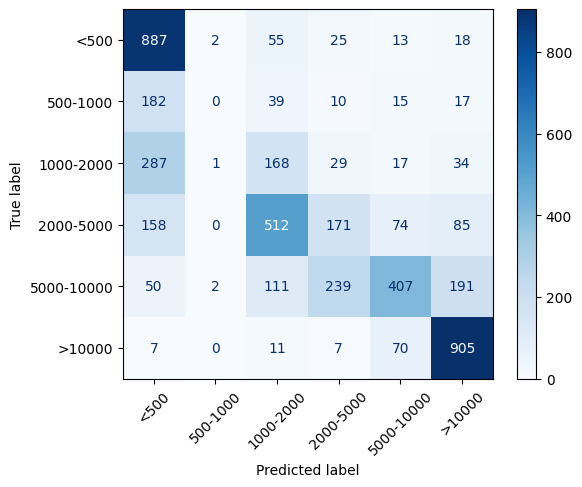

In [52]:
model = train_classic_model(
    SVC,
    {
        "C": 10,
    },
    X_train=X_train_bal,
    y_train=y_train_bal,
)

y_test_pred = predict_classic_model(model, X_test_bal)
cm = confusion_matrix(y_test_bal, y_test_pred)
print(cm)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[
        "<500", "500-1000", "1000-2000", "2000-5000", "5000-10000", ">10000"
    ]
)
disp.plot(
    values_format="d",
    xticks_rotation=45,
    cmap="Blues"
)

In [ ]:
model = train_classic_model(
    SVC,
    {
        "C": 10,
    },
    X_train=X_train_bal,
    y_train=y_train_bal,
)

y_test_pred = predict_classic_model(model, X_test_bal)


## RFC

In [ ]:
tuner = tune.Tuner(
    tune.with_parameters(
        train_model_tune,
        model_cls=RandomForestClassifier,
        X_train=X_train_bal,
        y_train=y_train_bal,
        X_val=X_val_bal,
        y_val=y_val_bal,
    ),
    param_space={
        "n_estimators": tune.grid_search([10, 50, 75, 100, 150, 200]),
        "max_depth": tune.grid_search([1, 3, 5, 10, None]),
        "criterion": tune.grid_search(['gini', 'log_loss', 'entropy'])
    },
    tune_config=tune.TuneConfig(
        num_samples=1,
        metric="f1",
        mode="max"
    )
)

results = tuner.fit()
best_metrics = results.get_best_result().metrics
print(f"Best params: {results.get_best_result().config}")
for k, v in best_metrics.items():
  if isinstance(v, float):
    print(f"{k}: {v:.4f}")
  else:
    print(f"{k}: {v}")

2025-06-08 14:07:32,200	INFO worker.py:1888 -- Started a local Ray instance.
2025-06-08 14:07:33,727	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+-------------------------------------------------------------------------+
| Configuration for experiment     train_model_tune_2025-06-08_14-07-29   |
+-------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                  |
| Scheduler                        FIFOScheduler                          |
| Number of trials                 90                                     |
+-------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_tune_2025-06-08_14-07-29
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-08_14-07-29_471419_2985/artifacts/2025-06-08_14-07-33/train_model_tune_2025-06-08_14-07-29/driver_artifacts`

Trial status: 90 PENDING
Current time: 2025-06-08 14:07:35. Total running time: 1s
Logical resource usage: 8.0/8 CPUs, 0/0 GPUs
+-------------------------------------------------

(train_model_tune pid=5746) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model_tune pid=5746)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Trial train_model_tune_ec733_00006 completed after 1 iterations at 2025-06-08 14:07:39. Total running time: 5s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00006 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                               0.6168 |
| time_total_s                                   0.6168 |
| training_iteration                                  1 |
| accuracy                                      0.59833 |
| f1                                            0.48327 |
| precision                                     0.47905 |
| recall                                        0.52352 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00005 completed after 1 iterations at 2025-06-08 14:07:40. Total running time: 6s
+-------------------------------------------------------+
| Trial train_model_tu

(train_model_tune pid=6467) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 8x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(train_model_tune pid=6467)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 8x across cluster]



Trial train_model_tune_ec733_00013 completed after 1 iterations at 2025-06-08 14:07:46. Total running time: 12s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00013 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              0.77127 |
| time_total_s                                  0.77127 |
| training_iteration                                  1 |
| accuracy                                      0.61671 |
| f1                                            0.51444 |
| precision                                     0.51408 |
| recall                                        0.53238 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00014 completed after 1 iterations at 2025-06-08 14:07:46. Total running time: 12s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=6884) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 2x across cluster]
(train_model_tune pid=6884)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 2x across cluster]



Trial train_model_tune_ec733_00019 started with configuration:
+--------------------------------------------------------+
| Trial train_model_tune_ec733_00019 config              |
+--------------------------------------------------------+
| criterion                                     log_loss |
| max_depth                                            3 |
| n_estimators                                        50 |
+--------------------------------------------------------+

Trial train_model_tune_ec733_00018 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_ec733_00018 config          |
+----------------------------------------------------+
| criterion                                     gini |
| max_depth                                        3 |
| n_estimators                                    50 |
+----------------------------------------------------+

Trial train_model_tune_ec733_00020 started with configuration:
+---------

(train_model_tune pid=7627) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 8x across cluster]
(train_model_tune pid=7627)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 8x across cluster]



Trial train_model_tune_ec733_00025 completed after 1 iterations at 2025-06-08 14:08:01. Total running time: 27s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00025 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              2.09893 |
| time_total_s                                  2.09893 |
| training_iteration                                  1 |
| accuracy                                      0.64568 |
| f1                                            0.52958 |
| precision                                     0.55276 |
| recall                                        0.55424 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00026 completed after 1 iterations at 2025-06-08 14:08:01. Total running time: 27s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=8091) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 2x across cluster]
(train_model_tune pid=8091)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 2x across cluster]



Trial train_model_tune_ec733_00035 started with configuration:
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00035 config             |
+-------------------------------------------------------+
| criterion                                     entropy |
| max_depth                                           3 |
| n_estimators                                       75 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00037 started with configuration:
+--------------------------------------------------------+
| Trial train_model_tune_ec733_00037 config              |
+--------------------------------------------------------+
| criterion                                     log_loss |
| max_depth                                            5 |
| n_estimators                                        75 |
+--------------------------------------------------------+

Trial train_model_tune_ec733_00038 started with conf

(train_model_tune pid=8865) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 7x across cluster]
(train_model_tune pid=8865)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 7x across cluster]



Trial train_model_tune_ec733_00046 completed after 1 iterations at 2025-06-08 14:08:15. Total running time: 41s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00046 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              0.93936 |
| time_total_s                                  0.93936 |
| training_iteration                                  1 |
| accuracy                                      0.40669 |
| f1                                            0.27261 |
| precision                                     0.36749 |
| recall                                        0.35872 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00040 completed after 1 iterations at 2025-06-08 14:08:16. Total running time: 42s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=9342) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 3x across cluster]
(train_model_tune pid=9342)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 3x across cluster]



Trial train_model_tune_ec733_00053 started with configuration:
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00053 config             |
+-------------------------------------------------------+
| criterion                                     entropy |
| max_depth                                           5 |
| n_estimators                                      100 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00049 completed after 1 iterations at 2025-06-08 14:08:23. Total running time: 49s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00049 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              1.39023 |
| time_total_s                                  1.39023 |
| training_iteration                                  1 |
| accuracy 

(train_model_tune pid=9987) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 6x across cluster]
(train_model_tune pid=9987)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 6x across cluster]



Trial train_model_tune_ec733_00061 completed after 1 iterations at 2025-06-08 14:08:30. Total running time: 56s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00061 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              1.08853 |
| time_total_s                                  1.08853 |
| training_iteration                                  1 |
| accuracy                                      0.39944 |
| f1                                            0.26606 |
| precision                                     0.39863 |
| recall                                        0.35246 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00056 completed after 1 iterations at 2025-06-08 14:08:31. Total running time: 57s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=10426) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 3x across cluster]
(train_model_tune pid=10426)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 3x across cluster]



Trial train_model_tune_ec733_00065 completed after 1 iterations at 2025-06-08 14:08:38. Total running time: 1min 4s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00065 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              2.30322 |
| time_total_s                                  2.30322 |
| training_iteration                                  1 |
| accuracy                                      0.59944 |
| f1                                            0.48325 |
| precision                                     0.47113 |
| recall                                        0.51382 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00064 completed after 1 iterations at 2025-06-08 14:08:38. Total running time: 1min 4s
+-------------------------------------------------------+
| Trial trai

(train_model_tune pid=10729) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 4x across cluster]
(train_model_tune pid=10729)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 4x across cluster]



Trial train_model_tune_ec733_00071 started with configuration:
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00071 config             |
+-------------------------------------------------------+
| criterion                                     entropy |
| max_depth                                          10 |
| n_estimators                                      150 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00068 completed after 1 iterations at 2025-06-08 14:08:42. Total running time: 1min 8s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00068 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              2.98503 |
| time_total_s                                  2.98503 |
| training_iteration                                  1 |
| accur

(train_model_tune pid=11248) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 2x across cluster]
(train_model_tune pid=11248)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 2x across cluster]



Trial train_model_tune_ec733_00076 completed after 1 iterations at 2025-06-08 14:08:49. Total running time: 1min 15s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00076 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              1.79604 |
| time_total_s                                  1.79604 |
| training_iteration                                  1 |
| accuracy                                      0.41114 |
| f1                                            0.27068 |
| precision                                     0.37727 |
| recall                                        0.35644 |
+-------------------------------------------------------+

Trial train_model_tune_ec733_00072 completed after 1 iterations at 2025-06-08 14:08:49. Total running time: 1min 15s
+-------------------------------------------------------+
| Trial tr

(train_model_tune pid=11431) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 3x across cluster]
(train_model_tune pid=11431)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 3x across cluster]



Trial train_model_tune_ec733_00082 started with configuration:
+--------------------------------------------------------+
| Trial train_model_tune_ec733_00082 config              |
+--------------------------------------------------------+
| criterion                                     log_loss |
| max_depth                                            5 |
| n_estimators                                       200 |
+--------------------------------------------------------+

Trial train_model_tune_ec733_00081 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_ec733_00081 config          |
+----------------------------------------------------+
| criterion                                     gini |
| max_depth                                        5 |
| n_estimators                                   200 |
+----------------------------------------------------+

Trial train_model_tune_ec733_00079 completed after 1 iterations at 2025-0

(train_model_tune pid=11746) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. [repeated 5x across cluster]
(train_model_tune pid=11746)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)) [repeated 5x across cluster]



Trial train_model_tune_ec733_00088 started with configuration:
+--------------------------------------------------------+
| Trial train_model_tune_ec733_00088 config              |
+--------------------------------------------------------+
| criterion                                     log_loss |
| max_depth                                              |
| n_estimators                                       200 |
+--------------------------------------------------------+

Trial train_model_tune_ec733_00084 completed after 1 iterations at 2025-06-08 14:09:01. Total running time: 1min 27s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00084 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                               5.5356 |
| time_total_s                                   5.5356 |
| training_iteration                                  1 |

2025-06-08 14:09:09,093	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_model_tune_2025-06-08_14-07-29' in 0.0279s.



Trial train_model_tune_ec733_00089 completed after 1 iterations at 2025-06-08 14:09:09. Total running time: 1min 35s
+-------------------------------------------------------+
| Trial train_model_tune_ec733_00089 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              6.31216 |
| time_total_s                                  6.31216 |
| training_iteration                                  1 |
| accuracy                                      0.64513 |
| f1                                            0.53135 |
| precision                                     0.55765 |
| recall                                         0.5537 |
+-------------------------------------------------------+

Trial status: 90 TERMINATED
Current time: 2025-06-08 14:09:09. Total running time: 1min 35s
Logical resource usage: 1.0/8 CPUs, 0/0 GPUs
Current best trial: ec733_00088 with f1=0.540522

In [ ]:
run_classic_model(
    RandomForestClassifier,
    results.get_best_result().config,
    X_train=X_train_bal,
    y_train=y_train_bal,
    X_val=X_val_bal,
    y_val=y_val_bal,
    X_test=X_test_bal,
    y_test=y_test_bal,
)

<class 'sklearn.ensemble._forest.RandomForestClassifier'> & 0.6443 ± 0.0016 & 0.5352 ± 0.0020 & 0.5548 ± 0.0138 & 0.5525 ± 0.0017 \\
[5.976006031036377, 5.948693513870239, 5.825795412063599, 5.819310188293457, 5.777020454406738]
5.8694 ± 0.0782


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:02:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


[[779  39  98  34  33  17]
 [116  21  50  34  24  18]
 [109  28 239  85  46  29]
 [ 50  12 158 479 236  65]
 [ 15   2  12 155 634 182]
 [  3   0   3  10 123 861]]


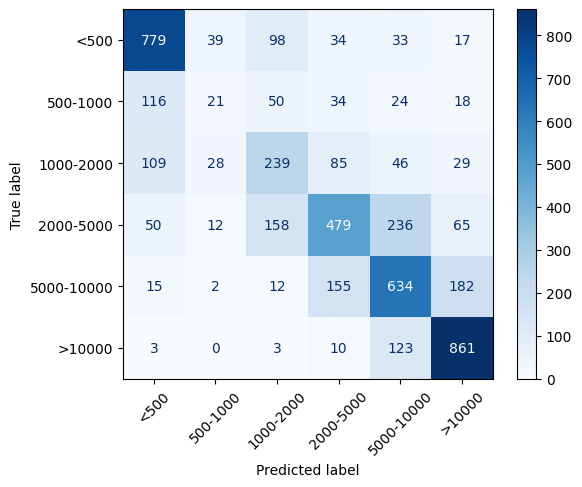

In [49]:
model = train_classic_model(
    XGBClassifier,
    {
        "n_estimators": 200,
        "max_depth": None,
        "criterion": 'log_loss'
    },
    X_train=X_train_bal,
    y_train=y_train_bal,
)

y_test_pred = predict_classic_model(model, X_test_bal)
cm = confusion_matrix(y_test_bal, y_test_pred)
print(cm)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[
        "<500", "500-1000", "1000-2000", "2000-5000", "5000-10000", ">10000"
    ]
)
disp.plot(
    values_format="d",
    xticks_rotation=45,
    cmap="Blues"
)

## XGB

In [ ]:
tuner = tune.Tuner(
    tune.with_parameters(
        train_model_tune,
        model_cls=XGBClassifier,
        X_train=X_train_bal,
        y_train=y_train_bal,
        X_val=X_val_bal,
        y_val=y_val_bal,
    ),
    param_space={
        "n_estimators": tune.grid_search([10, 50, 75, 100, 150, 200]),
        "max_depth": tune.grid_search([1, 3, 5, 10, None]),
        "booster": tune.grid_search(['gbtree', 'gblinear', 'dart'])
    },
    tune_config=tune.TuneConfig(
        num_samples=1,
        metric="f1",
        mode="max"
    )
)

results = tuner.fit()
best_metrics = results.get_best_result().metrics
print(f"Best params: {results.get_best_result().config}")
for k, v in best_metrics.items():
  if isinstance(v, float):
    print(f"{k}: {v:.4f}")
  else:
    print(f"{k}: {v}")

+-------------------------------------------------------------------------+
| Configuration for experiment     train_model_tune_2025-06-08_14-10-09   |
+-------------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator                  |
| Scheduler                        FIFOScheduler                          |
| Number of trials                 90                                     |
+-------------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_tune_2025-06-08_14-10-09
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-06-08_14-07-29_471419_2985/artifacts/2025-06-08_14-10-09/train_model_tune_2025-06-08_14-10-09/driver_artifacts`

Trial status: 90 PENDING
Current time: 2025-06-08 14:10:10. Total running time: 0s
Logical resource usage: 8.0/8 CPUs, 0/0 GPUs
+-------------------------------------------------

(train_model_tune pid=12581) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:14] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=12581) Parameters: { "max_depth" } are not used.
(train_model_tune pid=12581) 
(train_model_tune pid=12581)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00005 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00005 config          |
+----------------------------------------------------+
| booster                                       dart |
| max_depth                                        3 |
| n_estimators                                    10 |
+----------------------------------------------------+

Trial train_model_tune_496cf_00006 started with configuration:
+------------------------------------------------------+
| Trial train_model_tune_496cf_00006 config            |
+------------------------------------------------------+
| booster                                       gbtree |
| max_depth                                          5 |
| n_estimators                                      10 |
+------------------------------------------------------+

Trial train_model_tune_496cf_00000 completed after 1 iterations at 2025-06-08 14:10:15.

(train_model_tune pid=12582) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model_tune pid=12582)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
(train_model_tune pid=12583) 
(train_model_tune pid=12579) 



Trial train_model_tune_496cf_00001 completed after 1 iterations at 2025-06-08 14:10:15. Total running time: 5s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00001 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              0.77539 |
| time_total_s                                  0.77539 |
| training_iteration                                  1 |
| accuracy                                      0.58552 |
| f1                                            0.47134 |
| precision                                     0.45735 |
| recall                                        0.49779 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00004 completed after 1 iterations at 2025-06-08 14:10:16. Total running time: 6s
+-------------------------------------------------------+
| Trial train_model_tu

(train_model_tune pid=13084) 
(train_model_tune pid=13084) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:21] WARNING: /workspace/src/learner.cc:740:  [repeated 3x across cluster]
(train_model_tune pid=13084) Parameters: { "max_depth" } are not used. [repeated 3x across cluster]
(train_model_tune pid=13084)   warnings.warn(smsg, UserWarning) [repeated 3x across cluster]
(train_model_tune pid=12576) /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(train_model_tune pid=12576)   _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Trial train_model_tune_496cf_00009 started with configuration:
+------------------------------------------------------+
| Trial train_model_tune_496cf_00009 config            |
+------------------------------------------------------+
| booster                                       gbtree |
| max_depth                                         10 |
| n_estimators                                      10 |
+------------------------------------------------------+

Trial train_model_tune_496cf_00010 completed after 1 iterations at 2025-06-08 14:10:21. Total running time: 11s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00010 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              0.73184 |
| time_total_s                                  0.73184 |
| training_iteration                                  1 |
| accuracy        

(train_model_tune pid=13413) 



Trial train_model_tune_496cf_00008 completed after 1 iterations at 2025-06-08 14:10:26. Total running time: 16s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00008 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              5.62786 |
| time_total_s                                  5.62786 |
| training_iteration                                  1 |
| accuracy                                      0.65181 |
| f1                                             0.5613 |
| precision                                     0.57086 |
| recall                                        0.56747 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00015 completed after 1 iterations at 2025-06-08 14:10:26. Total running time: 16s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=13717) 
(train_model_tune pid=13717) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:29] WARNING: /workspace/src/learner.cc:740:  [repeated 2x across cluster]
(train_model_tune pid=13717) Parameters: { "max_depth" } are not used. [repeated 2x across cluster]
(train_model_tune pid=13717)   warnings.warn(smsg, UserWarning) [repeated 2x across cluster]



Trial train_model_tune_496cf_00014 completed after 1 iterations at 2025-06-08 14:10:29. Total running time: 19s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00014 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              4.75219 |
| time_total_s                                  4.75219 |
| training_iteration                                  1 |
| accuracy                                      0.64401 |
| f1                                            0.54823 |
| precision                                     0.54851 |
| recall                                        0.55873 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00018 completed after 1 iterations at 2025-06-08 14:10:29. Total running time: 20s
+-------------------------------------------------------+
| Trial train_model_

(train_model_tune pid=13916) 



Trial train_model_tune_496cf_00021 completed after 1 iterations at 2025-06-08 14:10:34. Total running time: 25s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00021 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              3.35831 |
| time_total_s                                  3.35831 |
| training_iteration                                  1 |
| accuracy                                      0.64903 |
| f1                                            0.56123 |
| precision                                     0.56424 |
| recall                                        0.56755 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00025 started with configuration:
+--------------------------------------------------------+
| Trial train_model_tune_496cf_00025 config              |
+--------

(train_model_tune pid=14093) 
(train_model_tune pid=14093) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:35] WARNING: /workspace/src/learner.cc:740:  [repeated 2x across cluster]
(train_model_tune pid=14093) Parameters: { "max_depth" } are not used. [repeated 2x across cluster]
(train_model_tune pid=14093)   warnings.warn(smsg, UserWarning) [repeated 2x across cluster]



Trial train_model_tune_496cf_00022 completed after 1 iterations at 2025-06-08 14:10:36. Total running time: 26s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00022 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              3.09264 |
| time_total_s                                  3.09264 |
| training_iteration                                  1 |
| accuracy                                      0.63621 |
| f1                                            0.52204 |
| precision                                     0.51973 |
| recall                                        0.54651 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00026 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00026 config          |
+----------------

(train_model_tune pid=14481) 
(train_model_tune pid=14481) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:48] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=14481) Parameters: { "max_depth" } are not used.
(train_model_tune pid=14481)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00030 completed after 1 iterations at 2025-06-08 14:10:48. Total running time: 38s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00030 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              1.23956 |
| time_total_s                                  1.23956 |
| training_iteration                                  1 |
| accuracy                                      0.64457 |
| f1                                            0.53515 |
| precision                                     0.54527 |
| recall                                        0.55167 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00032 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00032 config          |
+----------------

(train_model_tune pid=14780) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:57] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=14780) Parameters: { "max_depth" } are not used.
(train_model_tune pid=14780) 
(train_model_tune pid=14780)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00034 completed after 1 iterations at 2025-06-08 14:11:01. Total running time: 51s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00034 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              3.62458 |
| time_total_s                                  3.62458 |
| training_iteration                                  1 |
| accuracy                                       0.6429 |
| f1                                            0.52884 |
| precision                                      0.5242 |
| recall                                        0.55261 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00035 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00035 config          |
+----------------

(train_model_tune pid=15116) 
(train_model_tune pid=15116) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:11:16] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=15116) Parameters: { "max_depth" } are not used.
(train_model_tune pid=15116)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00037 completed after 1 iterations at 2025-06-08 14:11:20. Total running time: 1min 10s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00037 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              3.66797 |
| time_total_s                                  3.66797 |
| training_iteration                                  1 |
| accuracy                                       0.6429 |
| f1                                            0.52884 |
| precision                                      0.5242 |
| recall                                        0.55261 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00038 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00038 config          |
+-----------

(train_model_tune pid=15685) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:33] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=15685) Parameters: { "max_depth" } are not used.
(train_model_tune pid=15685) 
(train_model_tune pid=15685)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00040 completed after 1 iterations at 2025-06-08 14:12:37. Total running time: 2min 27s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00040 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                               3.7202 |
| time_total_s                                   3.7202 |
| training_iteration                                  1 |
| accuracy                                       0.6429 |
| f1                                            0.52884 |
| precision                                      0.5242 |
| recall                                        0.55261 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00041 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00041 config          |
+-----------

(train_model_tune pid=16196) 
(train_model_tune pid=16196) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:12:52] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=16196) Parameters: { "max_depth" } are not used.
(train_model_tune pid=16196)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00047 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00047 config          |
+----------------------------------------------------+
| booster                                       dart |
| max_depth                                        1 |
| n_estimators                                   100 |
+----------------------------------------------------+

Trial train_model_tune_496cf_00048 started with configuration:
+------------------------------------------------------+
| Trial train_model_tune_496cf_00048 config            |
+------------------------------------------------------+
| booster                                       gbtree |
| max_depth                                          3 |
| n_estimators                                     100 |
+------------------------------------------------------+

Trial train_model_tune_496cf_00046 completed after 1 iterations at 2025-06-08 14:12:57.

(train_model_tune pid=16457) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:03] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=16457) Parameters: { "max_depth" } are not used.
(train_model_tune pid=16457) 
(train_model_tune pid=16457)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00050 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00050 config          |
+----------------------------------------------------+
| booster                                       dart |
| max_depth                                        3 |
| n_estimators                                   100 |
+----------------------------------------------------+

Trial train_model_tune_496cf_00049 completed after 1 iterations at 2025-06-08 14:13:07. Total running time: 2min 57s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00049 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              4.71345 |
| time_total_s                                  4.71345 |
| training_iteration                                  1 |
| accuracy                 

(train_model_tune pid=16762) 
(train_model_tune pid=16762) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:13:23] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=16762) Parameters: { "max_depth" } are not used.
(train_model_tune pid=16762)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00052 completed after 1 iterations at 2025-06-08 14:13:28. Total running time: 3min 18s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00052 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                               4.6695 |
| time_total_s                                   4.6695 |
| training_iteration                                  1 |
| accuracy                                      0.64624 |
| f1                                             0.5357 |
| precision                                     0.53515 |
| recall                                        0.55717 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00053 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00053 config          |
+-----------

(train_model_tune pid=17524) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:15:26] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=17524) Parameters: { "max_depth" } are not used.
(train_model_tune pid=17524) 
(train_model_tune pid=17524)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00054 completed after 1 iterations at 2025-06-08 14:15:30. Total running time: 5min 20s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00054 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                               12.489 |
| time_total_s                                   12.489 |
| training_iteration                                  1 |
| accuracy                                      0.63175 |
| f1                                            0.53906 |
| precision                                     0.54254 |
| recall                                        0.54864 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00055 completed after 1 iterations at 2025-06-08 14:15:31. Total running time: 5min 21s
+-------------------------------------------------------+
| Trial tr

(train_model_tune pid=18168) 
(train_model_tune pid=18168) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:07] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=18168) Parameters: { "max_depth" } are not used.
(train_model_tune pid=18168)   warnings.warn(smsg, UserWarning)



Trial status: 54 TERMINATED | 8 RUNNING | 28 PENDING
Current time: 2025-06-08 14:16:11. Total running time: 6min 1s
Logical resource usage: 8.0/8 CPUs, 0/0 GPUs
Current best trial: 496cf_00048 with f1=0.5633897762245342 and params={'n_estimators': 100, 'max_depth': 3, 'booster': 'gbtree'}
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                     status         n_estimators     max_depth   booster       iter     total time (s)     accuracy         f1     precision     recall |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| train_model_tune_496cf_00041   RUNNING                  75            10   dart                                                                                   |
| train_model_tune_496cf_00044   RUNNING     

(train_model_tune pid=18741) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:24] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=18741) Parameters: { "max_depth" } are not used.
(train_model_tune pid=18741) 
(train_model_tune pid=18741)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00065 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00065 config          |
+----------------------------------------------------+
| booster                                       dart |
| max_depth                                        3 |
| n_estimators                                   150 |
+----------------------------------------------------+

Trial train_model_tune_496cf_00064 completed after 1 iterations at 2025-06-08 14:17:31. Total running time: 7min 22s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00064 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              7.06563 |
| time_total_s                                  7.06563 |
| training_iteration                                  1 |
| accuracy                 

(train_model_tune pid=19061) 
(train_model_tune pid=19061) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:49] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=19061) Parameters: { "max_depth" } are not used.
(train_model_tune pid=19061)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00067 completed after 1 iterations at 2025-06-08 14:17:56. Total running time: 7min 46s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00067 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              6.95877 |
| time_total_s                                  6.95877 |
| training_iteration                                  1 |
| accuracy                                      0.64903 |
| f1                                            0.53754 |
| precision                                     0.53697 |
| recall                                        0.55826 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00068 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00068 config          |
+-----------

(train_model_tune pid=20078) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:55] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=20078) Parameters: { "max_depth" } are not used.
(train_model_tune pid=20078) 
(train_model_tune pid=20078)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00071 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00071 config          |
+----------------------------------------------------+
| booster                                       dart |
| max_depth                                       10 |
| n_estimators                                   150 |
+----------------------------------------------------+

Trial train_model_tune_496cf_00070 completed after 1 iterations at 2025-06-08 14:21:01. Total running time: 10min 52s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00070 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              7.01597 |
| time_total_s                                  7.01597 |
| training_iteration                                  1 |
| accuracy                

(train_model_tune pid=20793) 
(train_model_tune pid=20793) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:44] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=20793) Parameters: { "max_depth" } are not used.
(train_model_tune pid=20793)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00076 completed after 1 iterations at 2025-06-08 14:21:53. Total running time: 11min 43s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00076 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              9.53478 |
| time_total_s                                  9.53478 |
| training_iteration                                  1 |
| accuracy                                      0.65237 |
| f1                                            0.54009 |
| precision                                     0.54266 |
| recall                                        0.56066 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00077 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00077 config          |
+----------

(train_model_tune pid=21553) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:48] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=21553) Parameters: { "max_depth" } are not used.
(train_model_tune pid=21553) 
(train_model_tune pid=21553)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00059 completed after 1 iterations at 2025-06-08 14:23:48. Total running time: 13min 38s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00059 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              475.005 |
| time_total_s                                  475.005 |
| training_iteration                                  1 |
| accuracy                                      0.63844 |
| f1                                            0.55169 |
| precision                                     0.55499 |
| recall                                        0.56013 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00080 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00080 config          |
+----------

(train_model_tune pid=21938) 
(train_model_tune pid=21938) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:24:19] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=21938) Parameters: { "max_depth" } are not used.
(train_model_tune pid=21938)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00082 completed after 1 iterations at 2025-06-08 14:24:28. Total running time: 14min 18s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00082 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              9.49911 |
| time_total_s                                  9.49911 |
| training_iteration                                  1 |
| accuracy                                      0.65237 |
| f1                                            0.54009 |
| precision                                     0.54266 |
| recall                                        0.56066 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00083 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00083 config          |
+----------

(train_model_tune pid=24516) /usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:33:45] WARNING: /workspace/src/learner.cc:740: 
(train_model_tune pid=24516) Parameters: { "max_depth" } are not used.
(train_model_tune pid=24516) 
(train_model_tune pid=24516)   warnings.warn(smsg, UserWarning)



Trial train_model_tune_496cf_00085 completed after 1 iterations at 2025-06-08 14:33:55. Total running time: 23min 46s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00085 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              9.84489 |
| time_total_s                                  9.84489 |
| training_iteration                                  1 |
| accuracy                                      0.65237 |
| f1                                            0.54009 |
| precision                                     0.54266 |
| recall                                        0.56066 |
+-------------------------------------------------------+

Trial train_model_tune_496cf_00086 started with configuration:
+----------------------------------------------------+
| Trial train_model_tune_496cf_00086 config          |
+----------

2025-06-08 14:55:10,012	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/train_model_tune_2025-06-08_14-10-09' in 0.0277s.



Trial train_model_tune_496cf_00089 completed after 1 iterations at 2025-06-08 14:55:09. Total running time: 45min 0s
+-------------------------------------------------------+
| Trial train_model_tune_496cf_00089 result             |
+-------------------------------------------------------+
| checkpoint_dir_name                                   |
| time_this_iter_s                              1187.79 |
| time_total_s                                  1187.79 |
| training_iteration                                  1 |
| accuracy                                      0.64067 |
| f1                                            0.55251 |
| precision                                     0.55377 |
| recall                                        0.56177 |
+-------------------------------------------------------+

Trial status: 90 TERMINATED
Current time: 2025-06-08 14:55:10. Total running time: 45min 0s
Logical resource usage: 1.0/8 CPUs, 0/0 GPUs
Current best trial: 496cf_00048 with f1=0.563389

In [ ]:
run_classic_model(
    XGBClassifier,
    results.get_best_result().config,
    X_train=X_train_bal,
    y_train=y_train_bal,
    X_val=X_val_bal,
    y_val=y_val_bal,
    X_test=X_test_bal,
    y_test=y_test_bal,
)

<class 'xgboost.sklearn.XGBClassifier'> & 0.6445 ± 0.0000 & 0.5539 ± 0.0000 & 0.5650 ± 0.0000 & 0.5602 ± 0.0000 \\
[0.9973106384277344, 0.6532695293426514, 0.6704707145690918, 0.7184817790985107, 0.7537915706634521]
0.7587 ± 0.1245


[[784  27  96  38  37  18]
 [112  18  58  31  28  16]
 [100  32 232  96  47  29]
 [ 43  11 168 472 234  72]
 [ 14   4  10 160 634 178]
 [  3   1   2   8 120 866]]


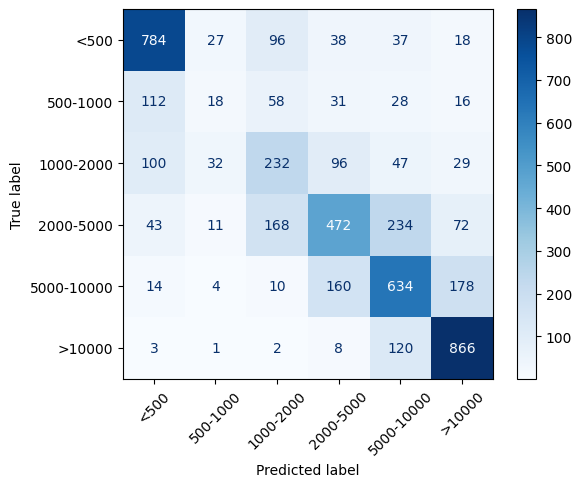

In [50]:
model = train_classic_model(
    XGBClassifier,
    {
        "n_estimators": 100,
        "max_depth": 3,
        "booster": 'gbtree'
    },
    X_train=X_train_bal,
    y_train=y_train_bal,
)

y_test_pred = predict_classic_model(model, X_test_bal)
cm = confusion_matrix(y_test_bal, y_test_pred)
print(cm)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[
        "<500", "500-1000", "1000-2000", "2000-5000", "5000-10000", ">10000"
    ]
)
disp.plot(
    values_format="d",
    xticks_rotation=45,
    cmap="Blues"
)

In [39]:
cm

array([[784,  27,  96,  38,  37,  18],
       [112,  18,  58,  31,  28,  16],
       [100,  32, 232,  96,  47,  29],
       [ 43,  11, 168, 472, 234,  72],
       [ 14,   4,  10, 160, 634, 178],
       [  3,   1,   2,   8, 120, 866]])

## Naiva Bayes

In [ ]:
# tuner = tune.Tuner(
#     tune.with_parameters(
#         train_model_tune,
#         model_cls=GaussianNB,
#         X_train=X_train_bal,
#         y_train=y_train_bal,
#         X_val=X_val_bal,
#         y_val=y_val_bal,
#     ),
#     param_space={
#         "n_estimators": tune.grid_search([10, 50, 75, 100, 150, 200]),
#         "max_depth": tune.grid_search([1, 3, 5, 10, None]),
#         "booster": tune.grid_search(['gbtree', 'gblinear', 'dart'])
#     },
#     tune_config=tune.TuneConfig(
#         num_samples=3,
#         metric="accuracy",
#         mode="max"
#     )
# )

# results = tuner.fit()
# best_metrics = results.get_best_result().metrics
# print(f"Best params: {results.get_best_result().config}")
# for k, v in best_metrics.items():
#   if isinstance(v, float):
#     print(f"{k}: {v:.4f}")
#   else:
#     print(f"{k}: {v}")

In [ ]:
run_classic_model(
    GaussianNB,
    # results.get_best_result().config,
    {},
    X_train=X_train_bal,
    y_train=y_train_bal,
    X_val=X_val_bal,
    y_val=y_val_bal,
    X_test=X_test_bal,
    y_test=y_test_bal,
)

<class 'sklearn.naive_bayes.GaussianNB'> & 0.4478 ± 0.0000 & 0.3575 ± 0.0000 & 0.3563 ± 0.0000 & 0.3757 ± 0.0000 \\
[0.009872674942016602, 0.007849454879760742, 0.007587432861328125, 0.007434368133544922, 0.007409334182739258]
0.0080 ± 0.0009
